## import required dependencies

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [1]:
import sqlite3
con = sqlite3.connect('youtube.db')

## import dataset

In [4]:

videos_df = pd.read_sql('select * from videos', con, index_col='index')
ChannelDetails = pd.read_sql('select * from ChannelDetails', con, index_col='index')

## basic data check

In [5]:
ChannelDetails.head()

Channel_id                 Channel_name  \
index                                                          
0      UC2J_VKrAzOEJuQvFFtj3KUw          Chennai Super Kings   
0      UCCq1xDJMBRF61kiOgU90_kw  Royal Challengers Bangalore   
0      UCEzB47eM-HZu04f4mB2nycg               Delhi Capitals   
0      UCvRa1LWA_-aARq1AQMC4AyA                 PUNJAB KINGS   
0      UCl23mvQ3321L7zO6JyzhVmg               Mumbai Indians   

                                     Channel_description  Channel_subscribers  \
index                                                                           
0      The Official YouTube Channel of the Chennai Su...              3140000   
0      This is the official YouTube channel of the IP...              3760000   
0      Delhi Capitals as the brand and team embodies ...               845000   
0      The official Youtube channel for Punjab Kings....               483000   
0      The official Youtube channel of Mumbai Indians...              3680000   

       Channel_view_Count  channel_Video_Count     Channel_Published_Date  \
index                                                                       
0               619495823                 1092  2009-04-17 13:00:30+00:00   
0               536938789                 2128  2010-02-04 13:11:41+00:00   
0               308970809                 3099  2011-12-22 07:25:48+00:00   
0                70429730                 1117  2010-07-27 07:43:57+00:00   
0              1525848487                 3851  2010-03-02 07:14:49+00:00   

                    Playlist_id  
index                            
0      UU2J_VKrAzOEJuQvFFtj3KUw  
0      UUCq1xDJMBRF61kiOgU90_kw  
0      UUEzB47eM-HZu04f4mB2nycg  
0      UUvRa1LWA_-aARq1AQMC4AyA  
0      UUl23mvQ3321L7zO6JyzhVmg

In [6]:
videos_df.head()

video_id         channelTitle  \
index                                     
0      f1gnaV4sWYo  Chennai Super Kings   
1      85adJ60bQqk  Chennai Super Kings   
2      zdZmopaH8vA  Chennai Super Kings   
3      r88fWNdYmPc  Chennai Super Kings   
4      o29L2ysDYeY  Chennai Super Kings   

                                                   title  \
index                                                      
0      That sounds Mo like a perfect team 😎Pick yours...   
1      Thala's birthday gift 🎥💛#CelebratingThala #Whi...   
2      The THALA Emotion - MS Dhoni Birthday Special ...   
3      Test Cricket’s an art and Bens got those maste...   
4      Does your All time XI match with that of Conwa...   

                                             description  \
index                                                      
0                                                          
1                                                          
2      It's his day, our day! Join in as we celebrate...   
3                                                          
4                                                          

                     publishedAt  viewCount  likeCount  commentCount  \
index                                                                  
0      2023-07-21 09:10:58+00:00      20408       2328            27   
1      2023-07-08 11:26:55+00:00     157877      28702           312   
2      2023-07-07 09:08:20+00:00     203360      21910          1148   
3      2023-07-04 11:17:36+00:00      43420       5905            29   
4      2023-07-03 10:46:32+00:00      44311       6658            80   

       Published_Year Published_Month  
index                                  
0                2023             Jul  
1                2023             Jul  
2                2023             Jul  
3                2023             Jul  
4                2023             Jul

In [7]:
numeric_cols = ['likeCount', 'viewCount', 'commentCount']

In [8]:
channels = videos_df.channelTitle.unique()
channels

array(['Chennai Super Kings', 'Royal Challengers Bangalore',
       'Delhi Capitals', 'PUNJAB KINGS', 'Mumbai Indians',
       'rajasthanroyals', 'Kolkata Knight Riders', 'SunrisersIPL',
       'Lucknow Super Giants', 'Gujarat Titans'], dtype=object)

## Univariate analysis

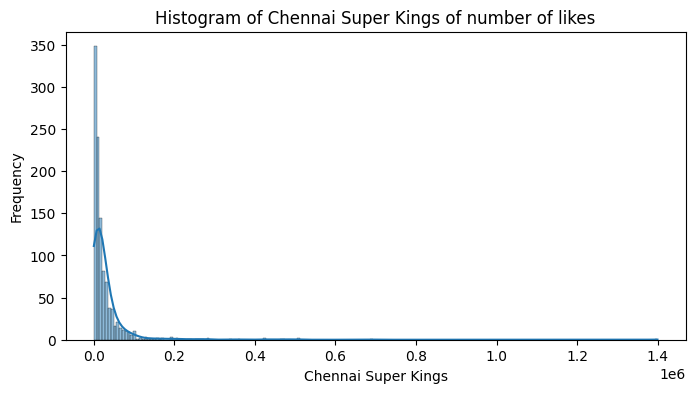

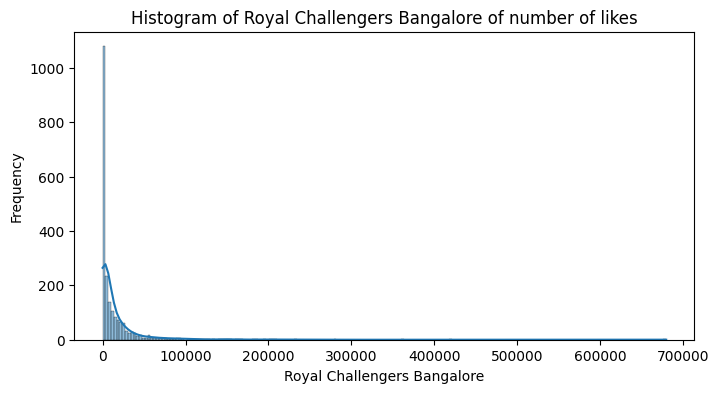

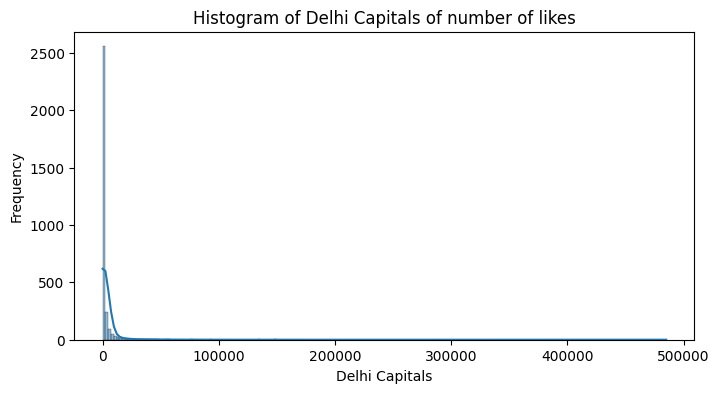

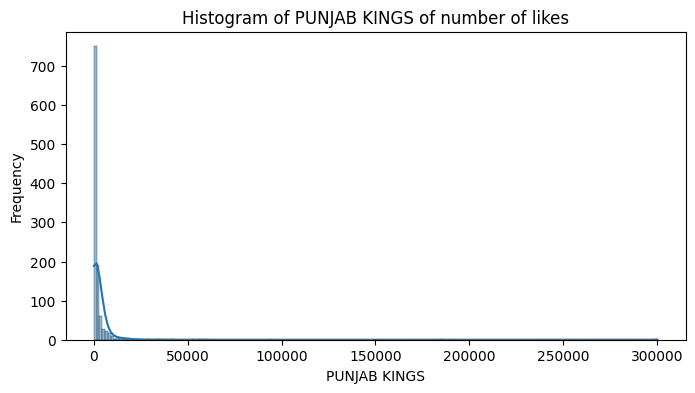

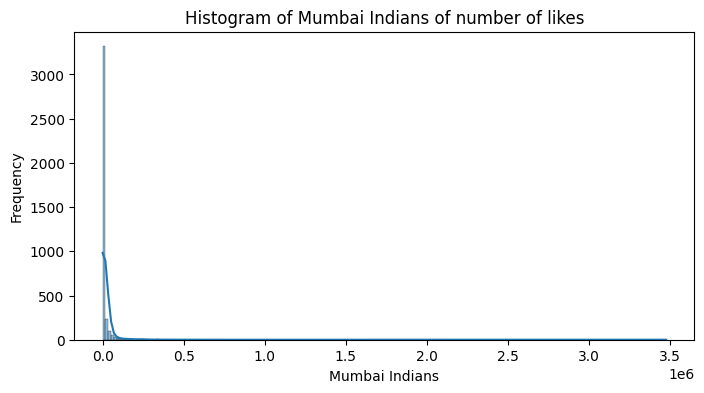

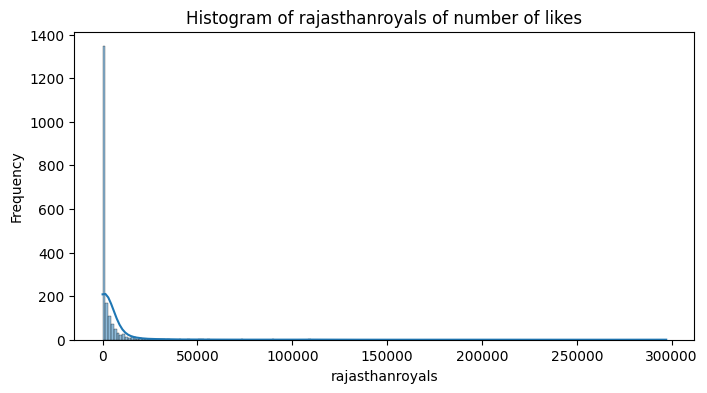

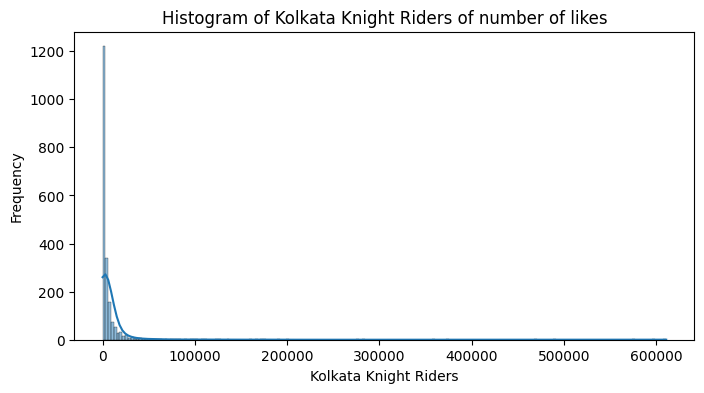

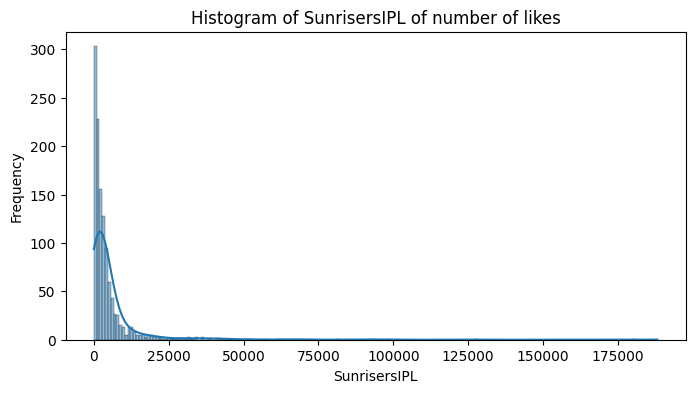

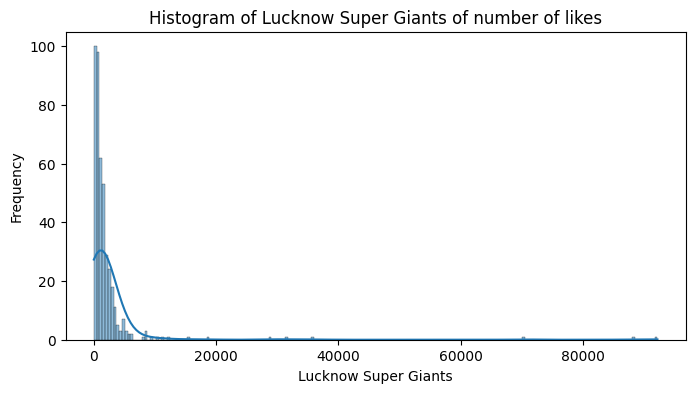

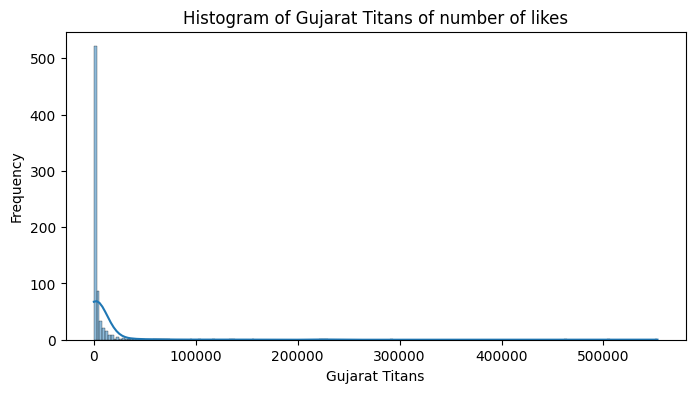

In [14]:
for col in channels:
    plt.figure(figsize=(8, 4))
    sns.histplot(videos_df[videos_df['channelTitle'] == col]['likeCount'], bins=200, kde=True)
    plt.title(f'Histogram of {col} of number of likes')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


General observation to be made is nearly 90% of the videos for all channels are less than 1000 likes.
But few videos have more than 10000 likes

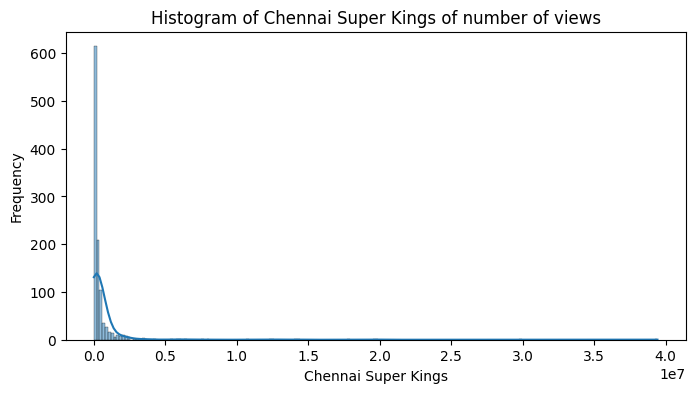

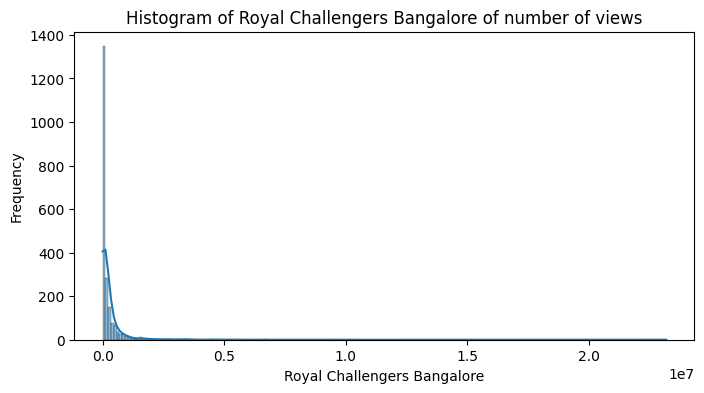

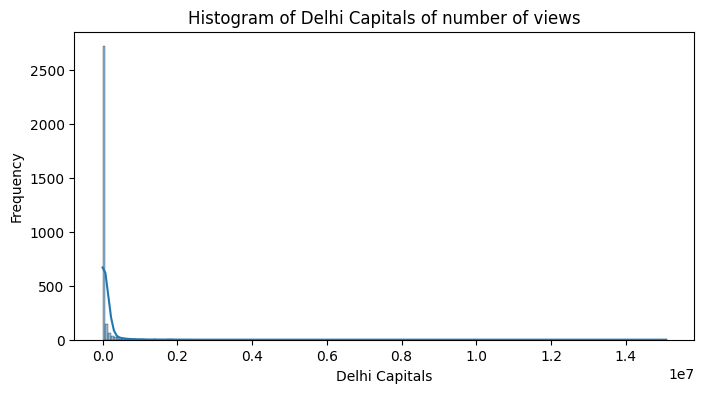

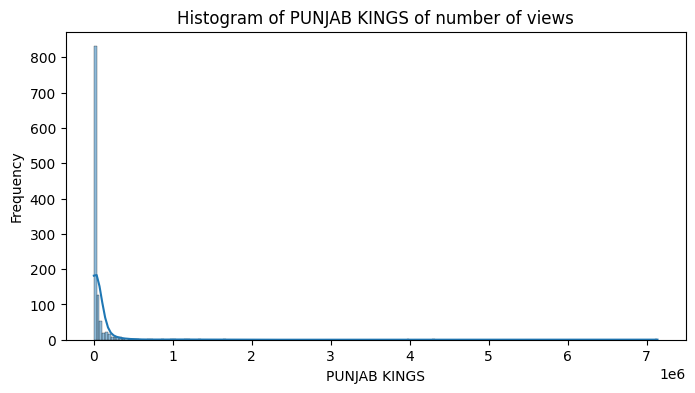

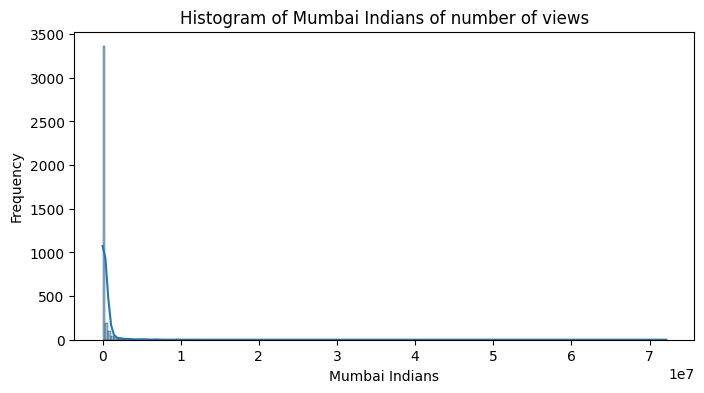

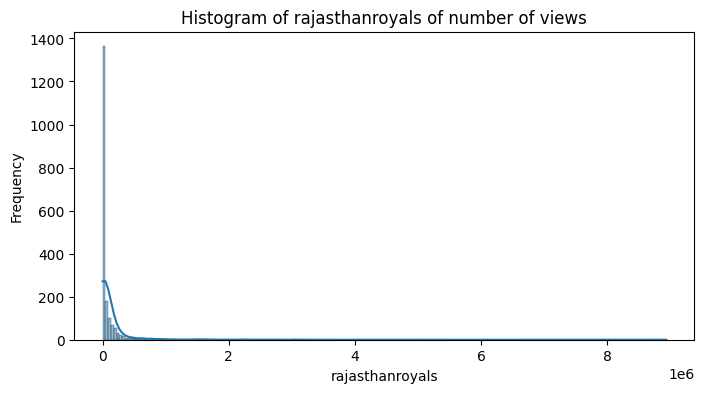

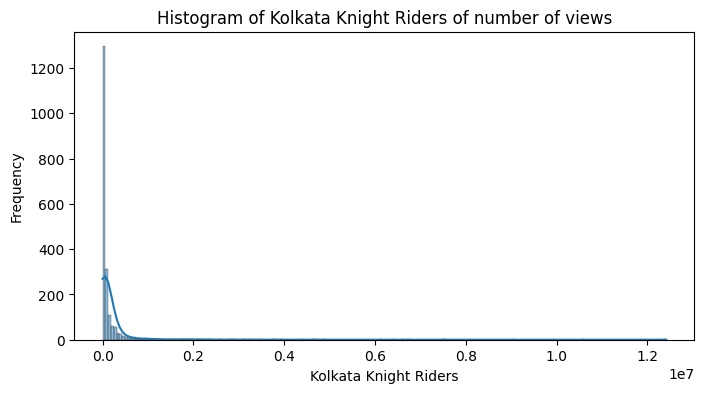

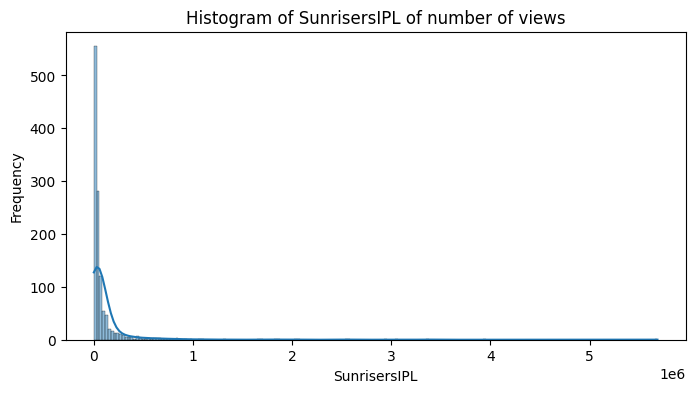

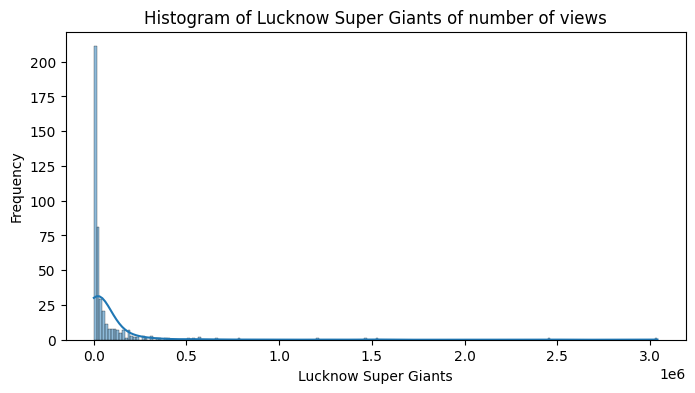

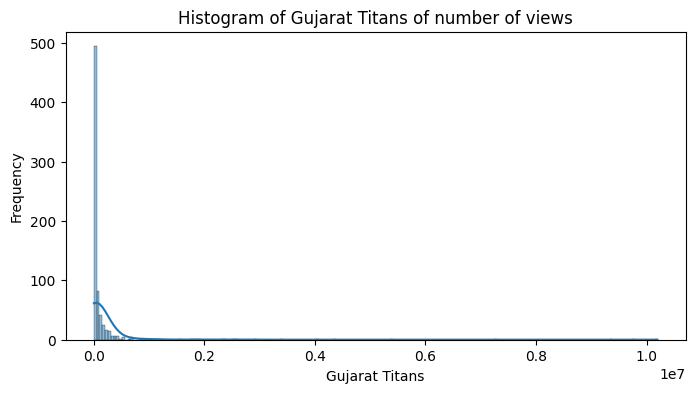

In [15]:
for col in channels:
    plt.figure(figsize=(8, 4))
    sns.histplot(videos_df[videos_df['channelTitle'] == col]['viewCount'], bins=200, kde=True)
    plt.title(f'Histogram of {col} of number of views')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Same as the likeCount, general observation to be made is nearly 90% of the videos for all channels are less than 1000 views.
But few videos have more than 10000 views

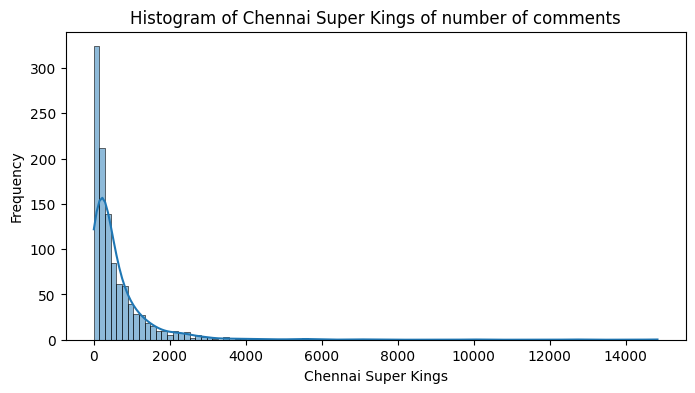

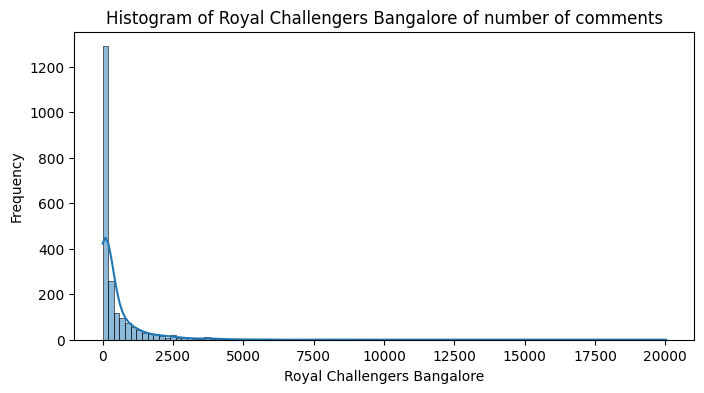

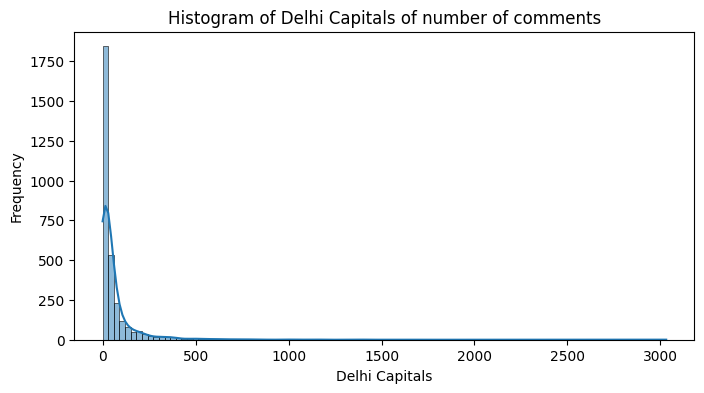

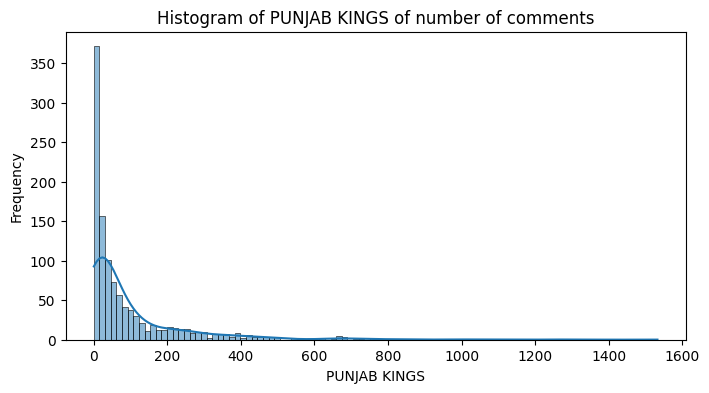

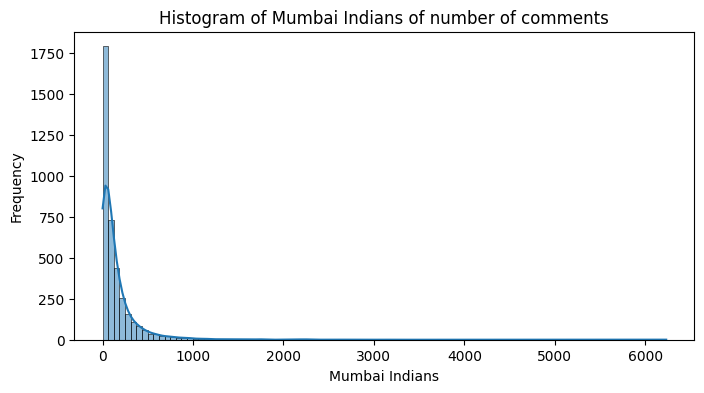

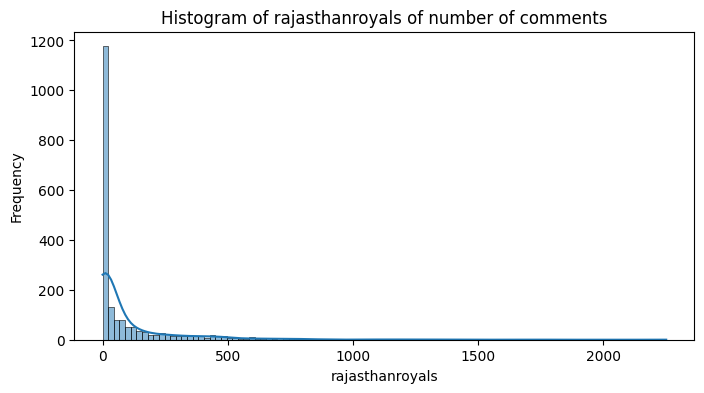

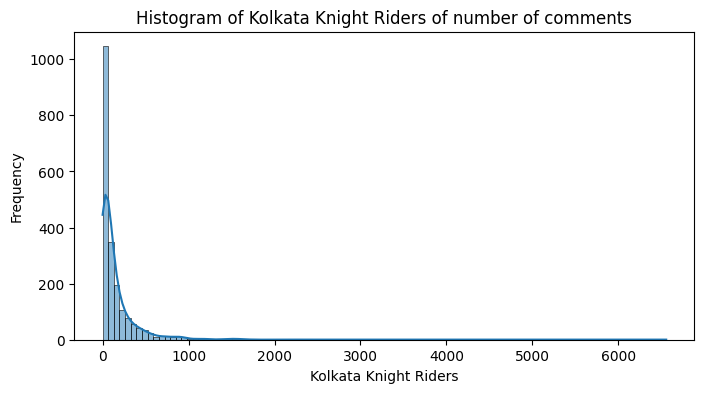

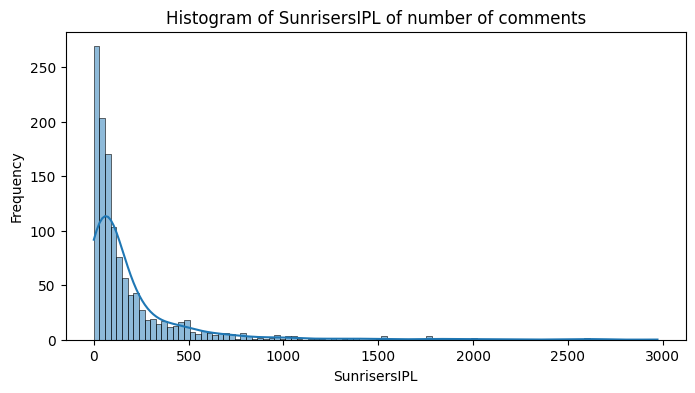

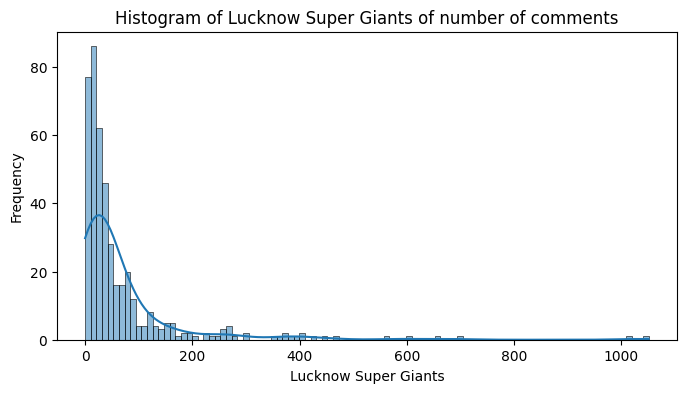

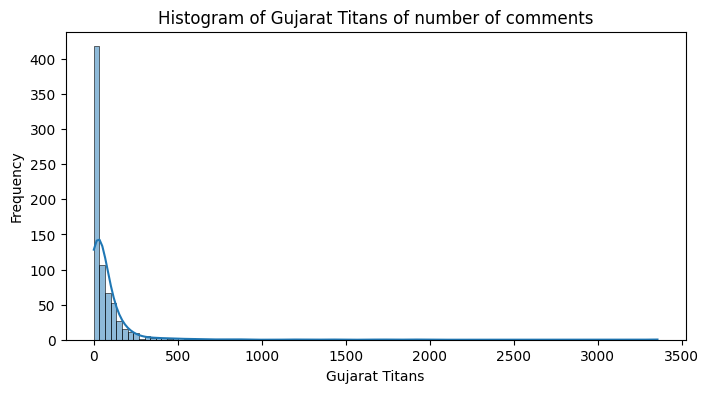

In [16]:
for col in channels:
    plt.figure(figsize=(8, 4))
    sns.histplot(videos_df[videos_df['channelTitle'] == col]['commentCount'], bins=100, kde=True)
    plt.title(f'Histogram of {col} of number of comments')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


Same as the likeCount, general observation to be made is nearly 90% of the videos for all channels are less than 500 comments.
But few videos have more than 1000 comments

## Bivariate analysis

<Figure size 800x400 with 0 Axes>

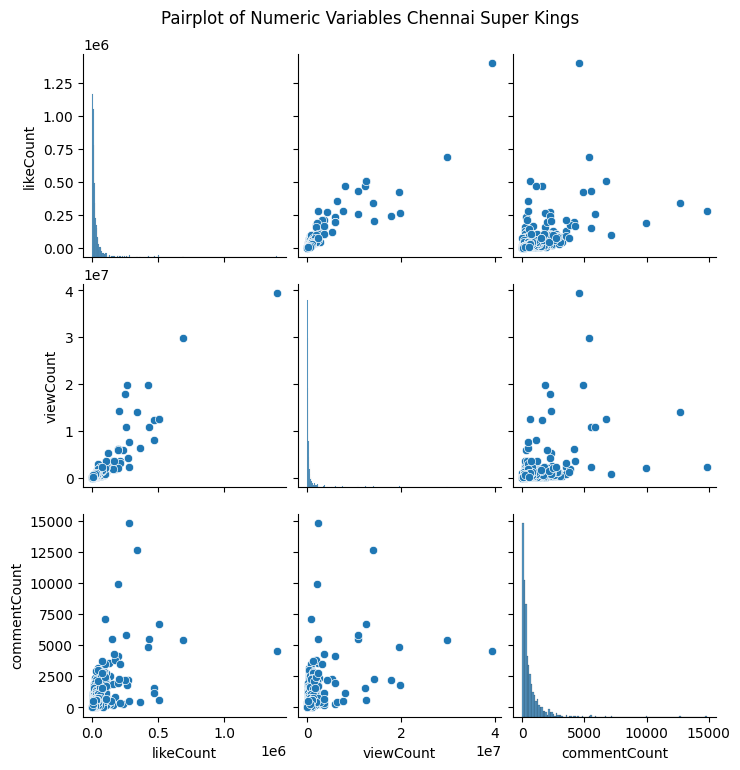

<Figure size 800x400 with 0 Axes>

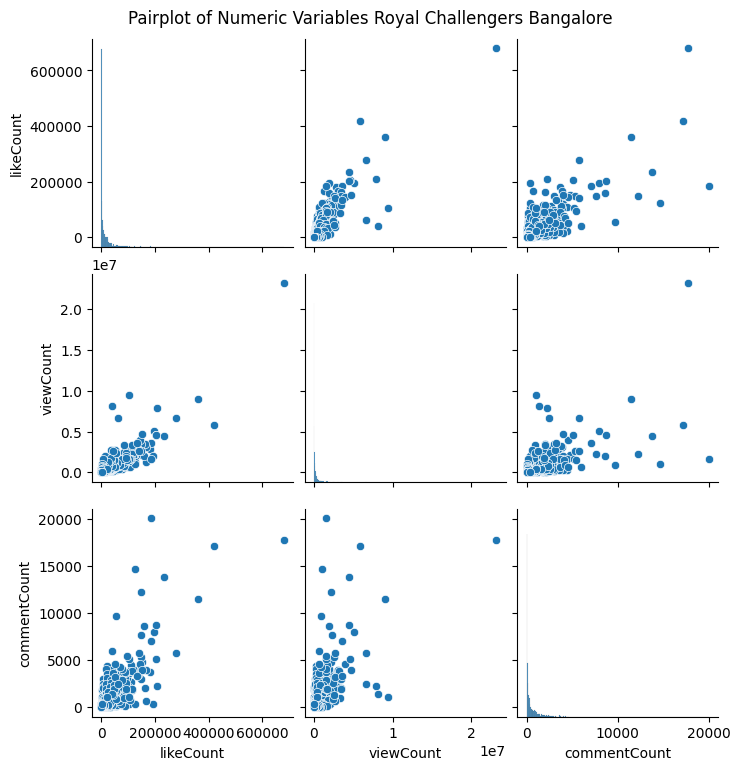

<Figure size 800x400 with 0 Axes>

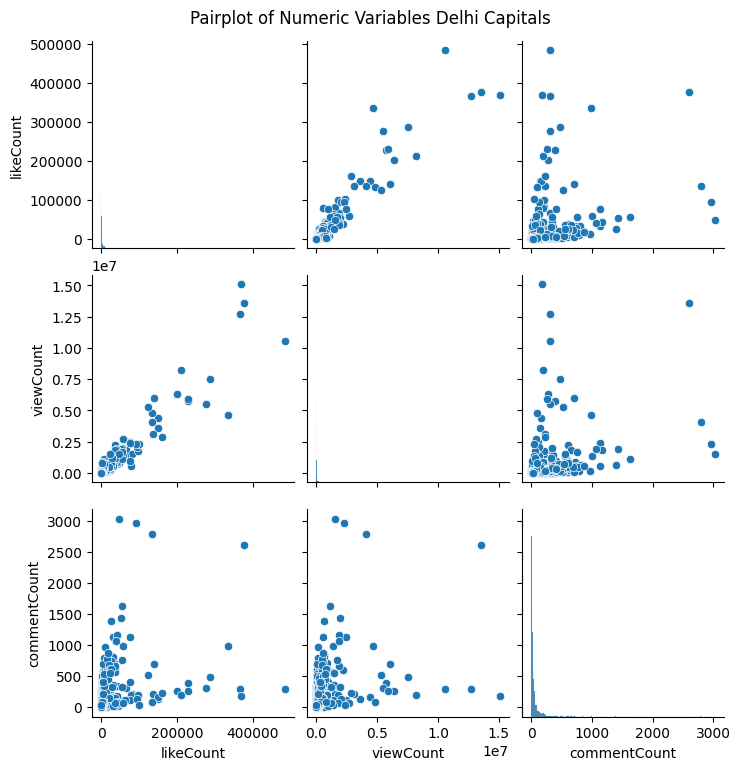

<Figure size 800x400 with 0 Axes>

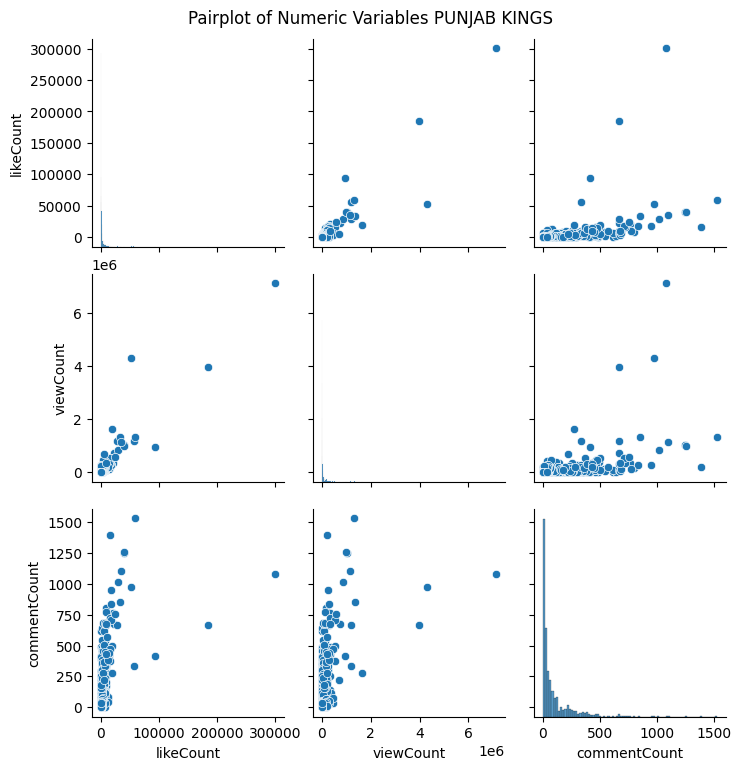

<Figure size 800x400 with 0 Axes>

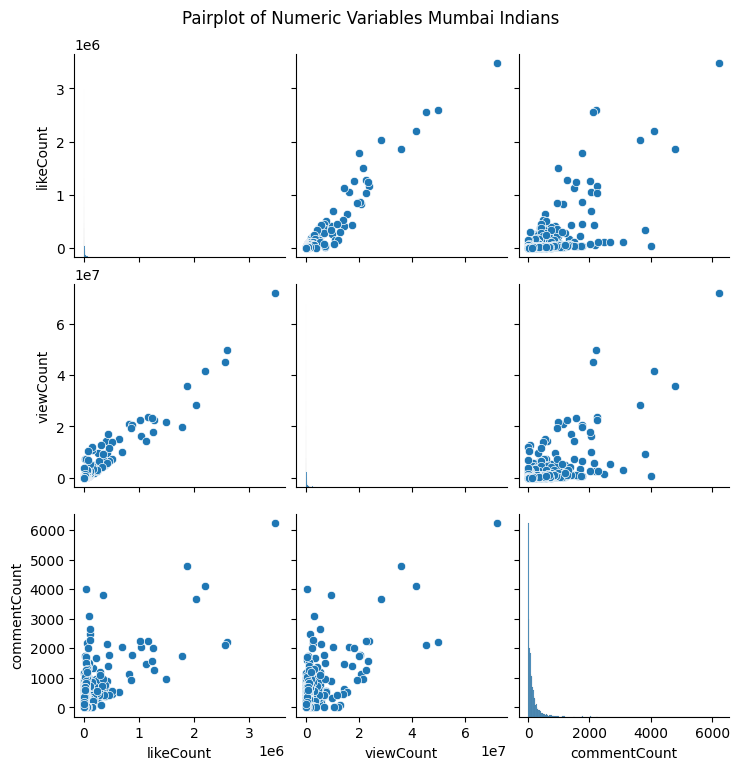

<Figure size 800x400 with 0 Axes>

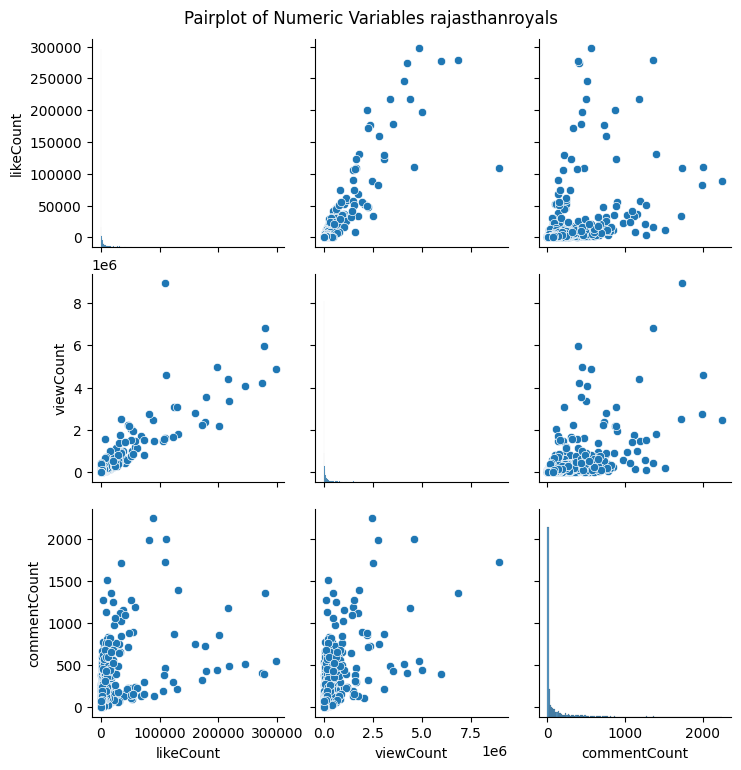

<Figure size 800x400 with 0 Axes>

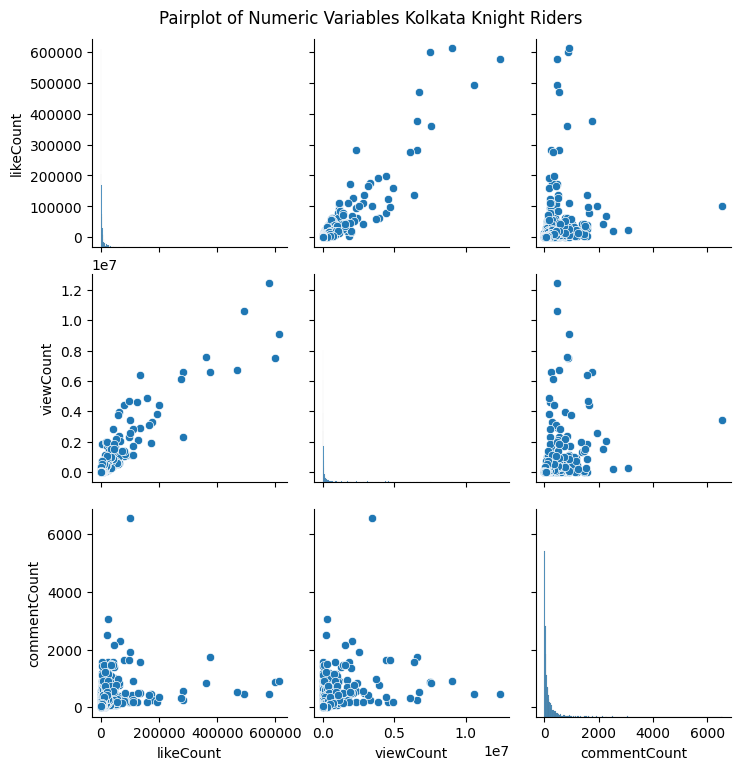

<Figure size 800x400 with 0 Axes>

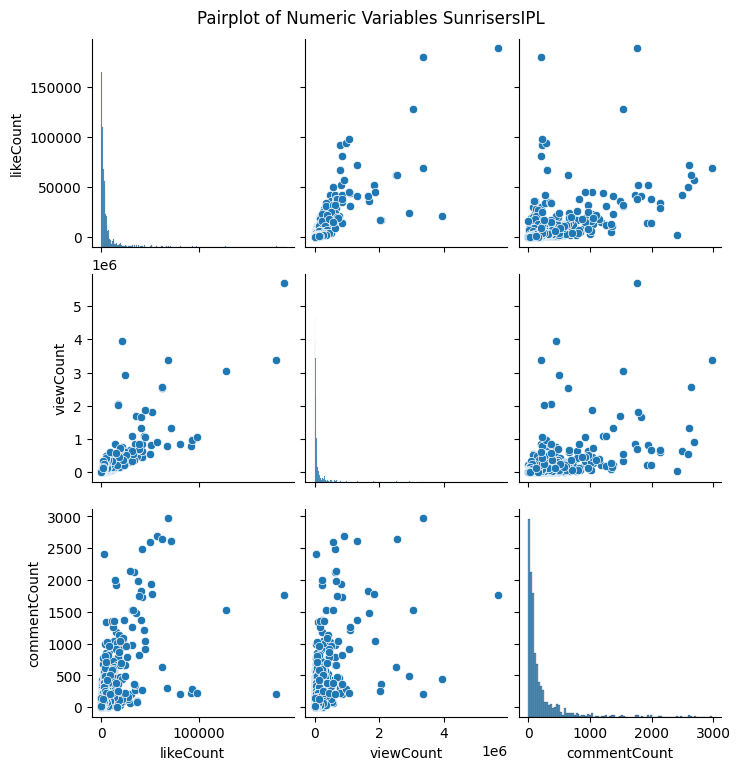

<Figure size 800x400 with 0 Axes>

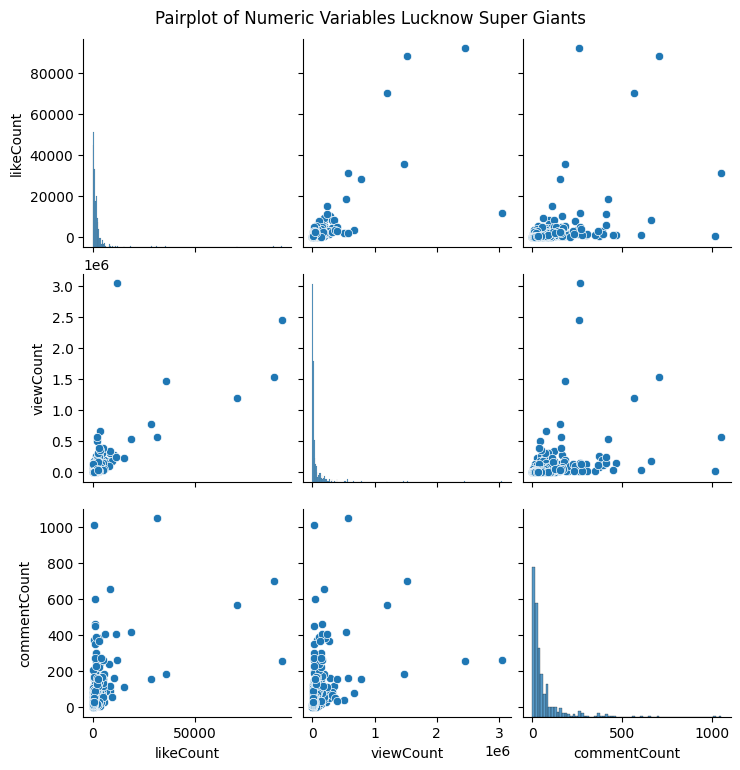

<Figure size 800x400 with 0 Axes>

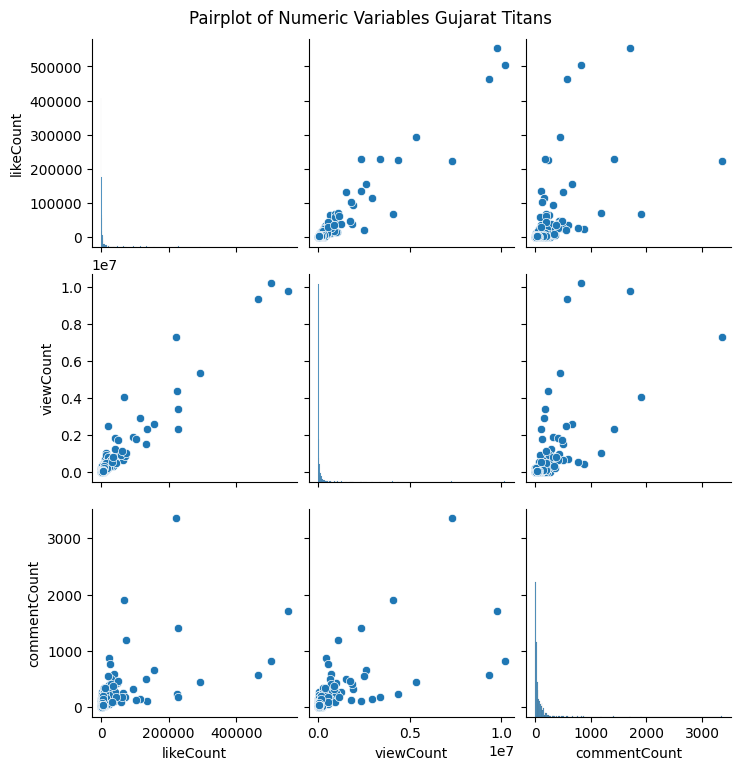

In [18]:
for col in channels:
    plt.figure(figsize=(8, 4))
    sns.pairplot(videos_df[videos_df['channelTitle'] == col][numeric_cols])
    plt.suptitle(f"Pairplot of Numeric Variables {col}", y=1.02)
    plt.show()

A general observation can be made that as the viewcount increases, the likecount also increases. But in general for comment count there is no correlation with any other variable

## Multivariate analysis

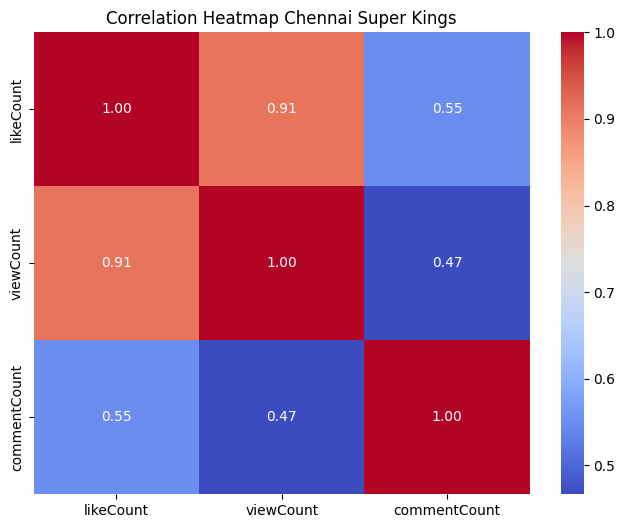

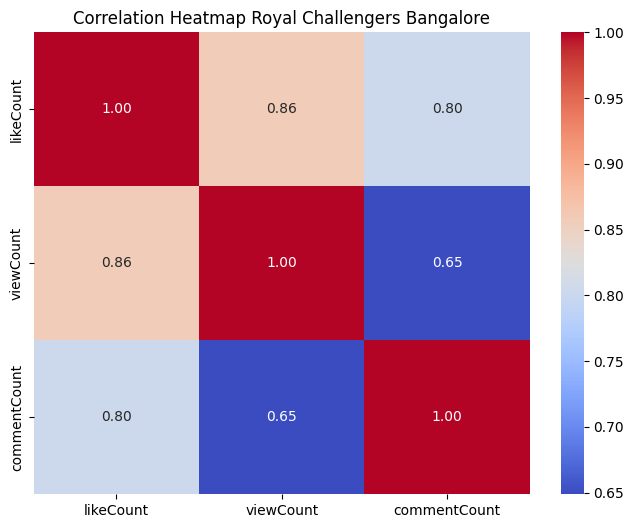

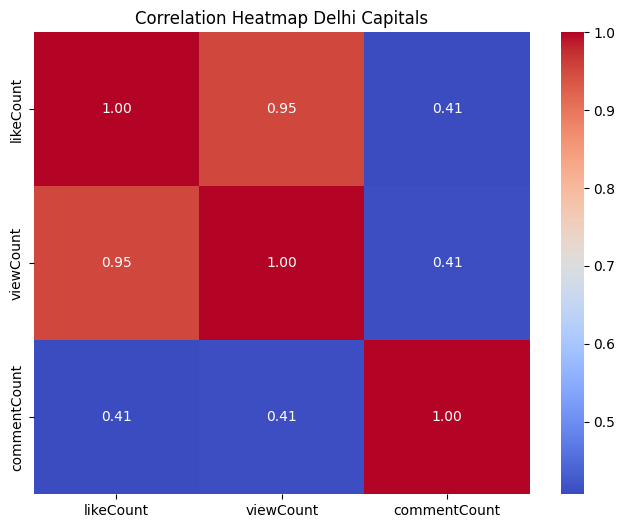

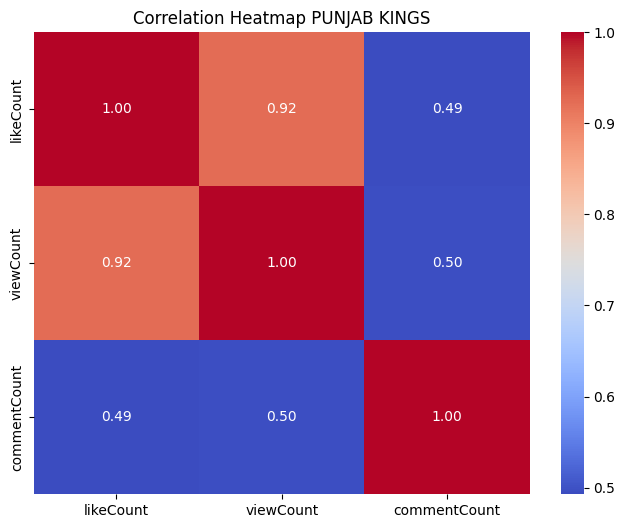

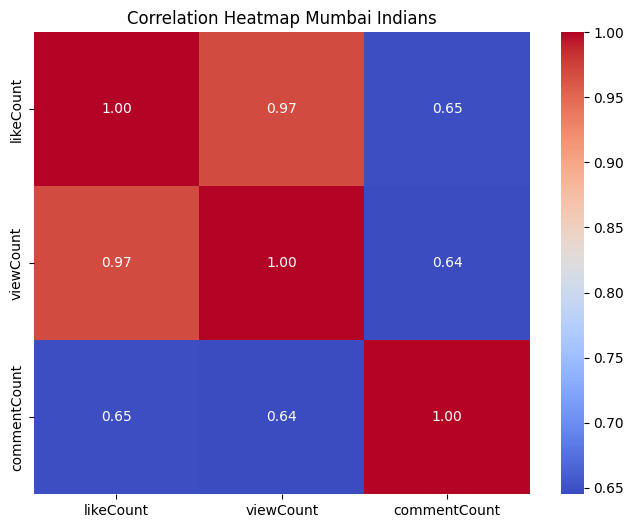

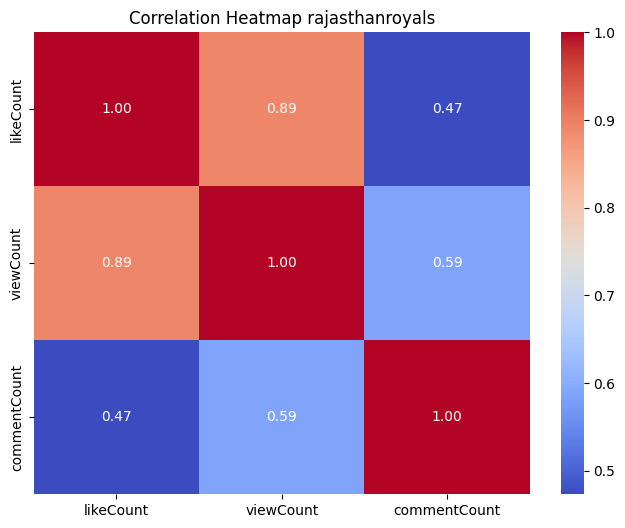

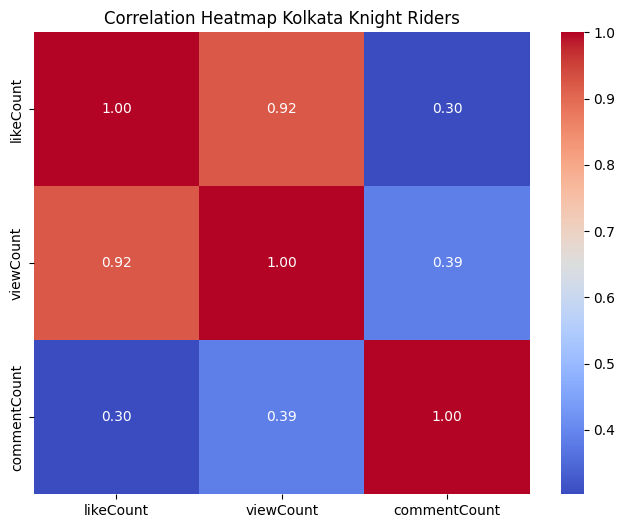

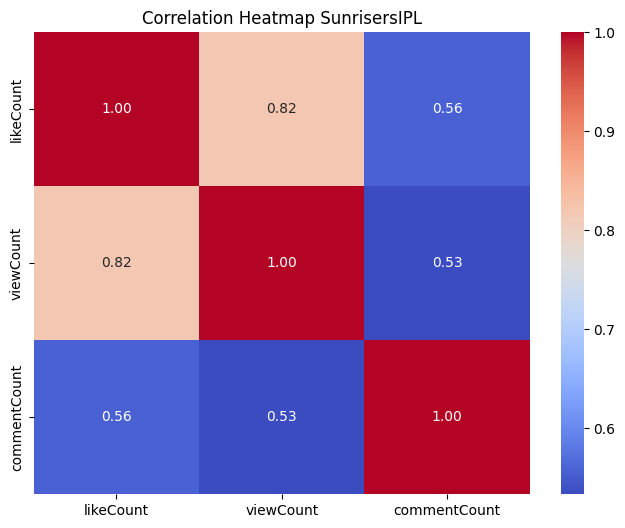

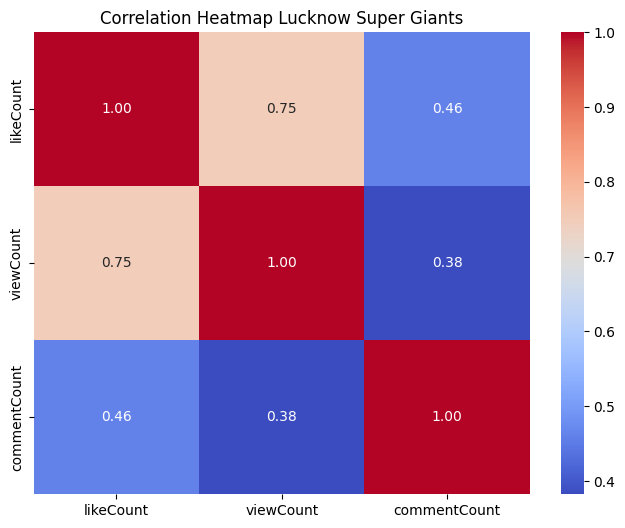

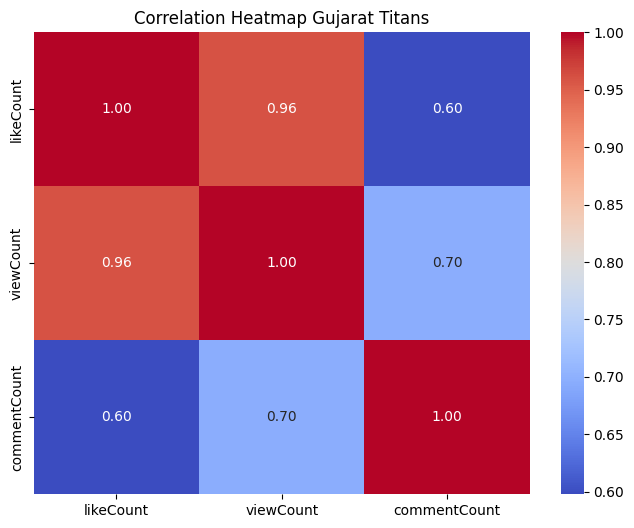

In [19]:
for col in channels:
    correlation_matrix = videos_df[videos_df['channelTitle'] == col][numeric_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f"Correlation Heatmap {col}")
    plt.show()

A general observation can be made that as the viewcount increases, the likecount also increases. But in general for comment count there is no correlation with any other variable

## Time based analysis

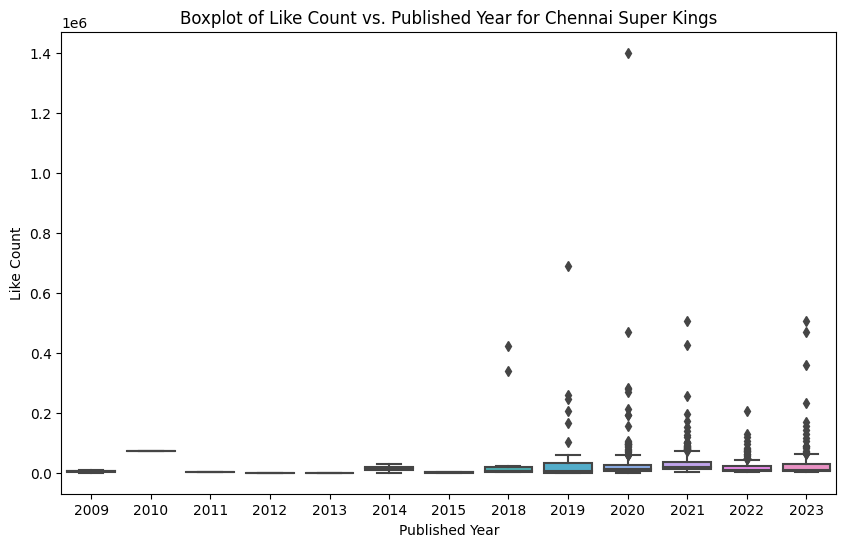

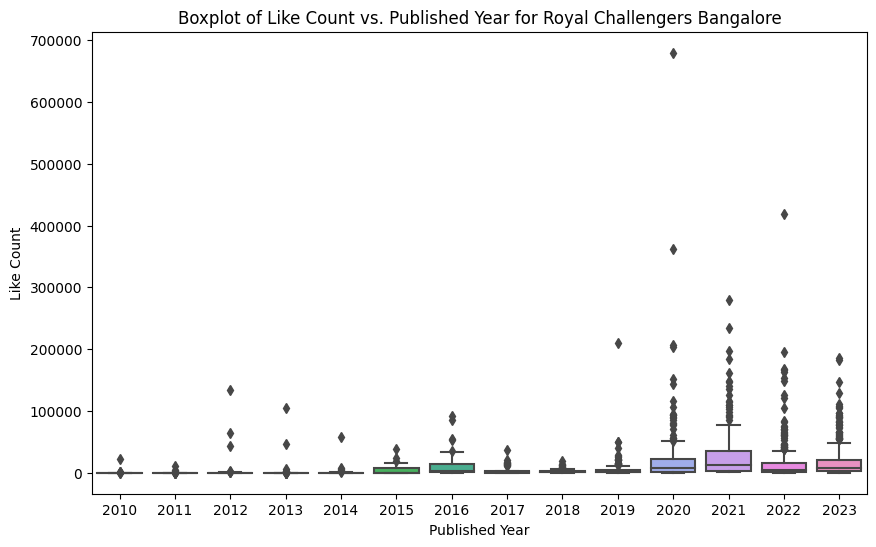

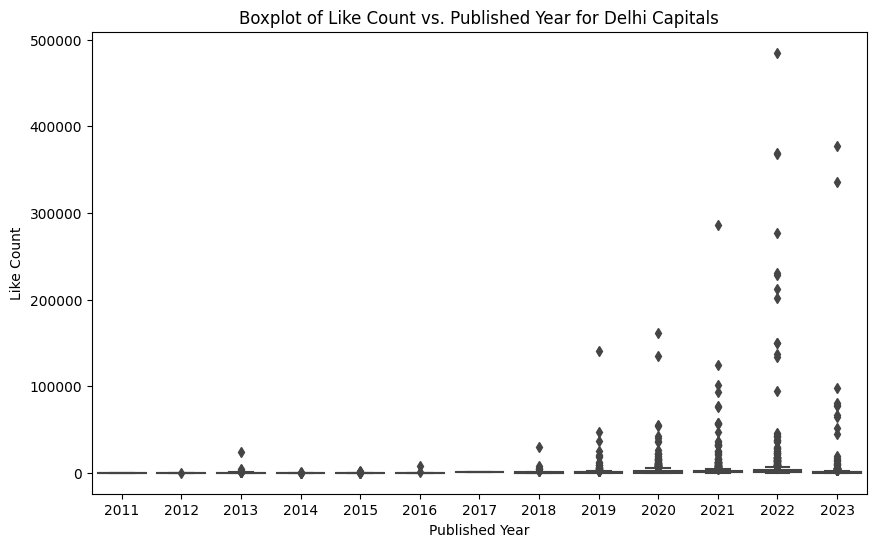

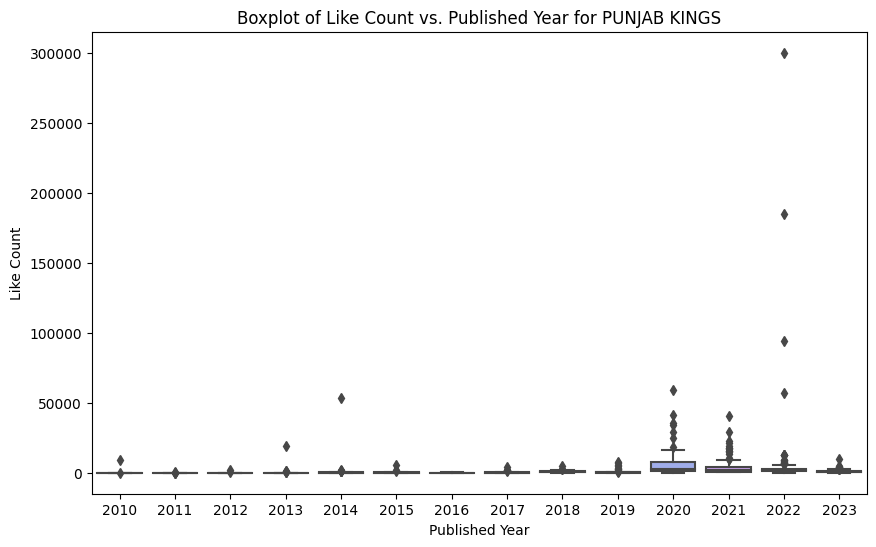

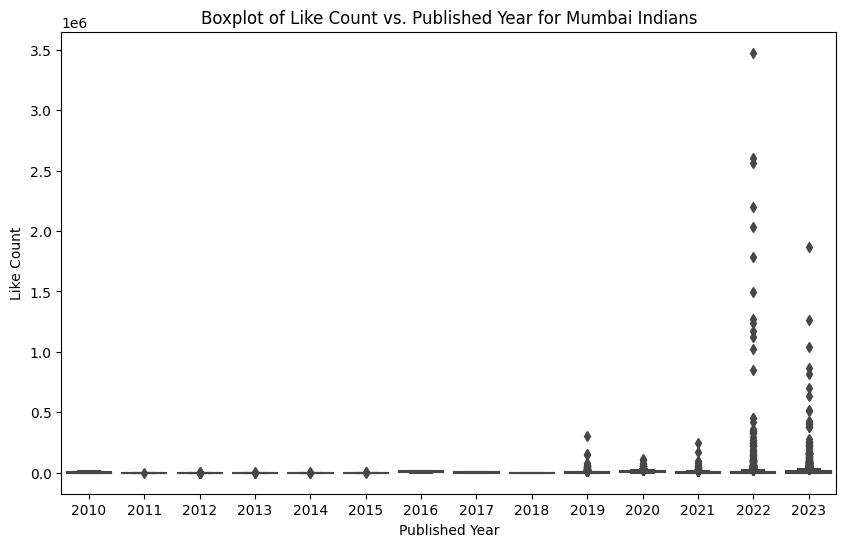

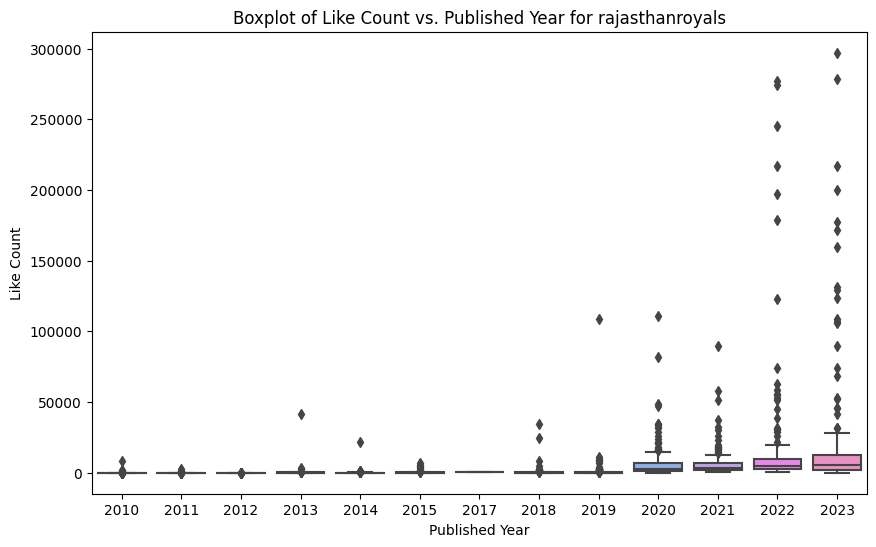

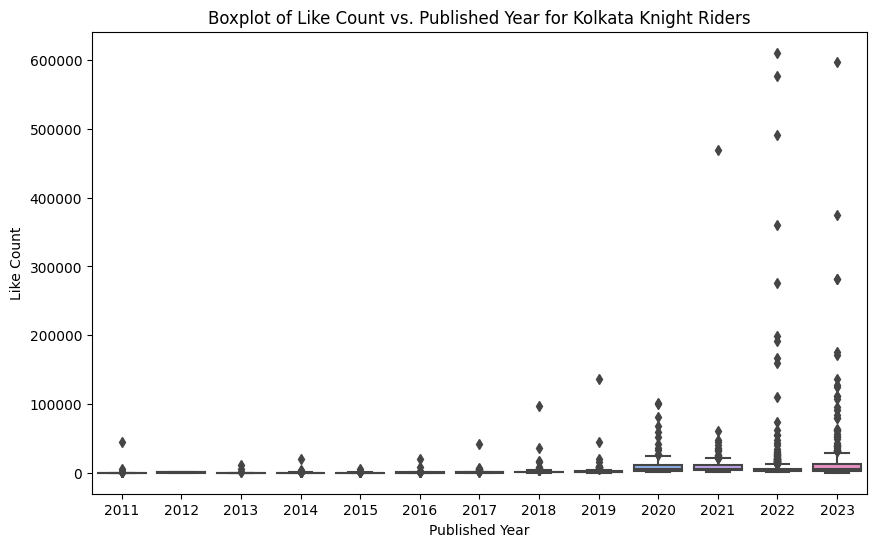

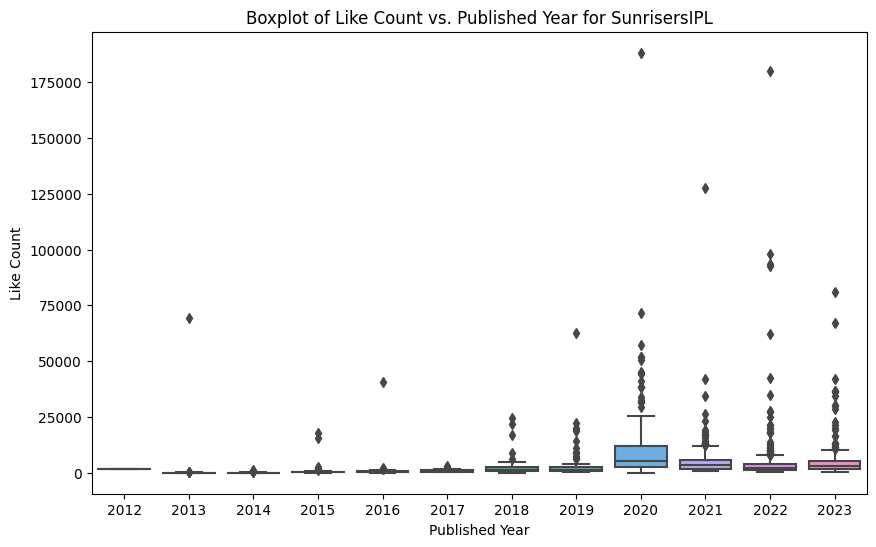

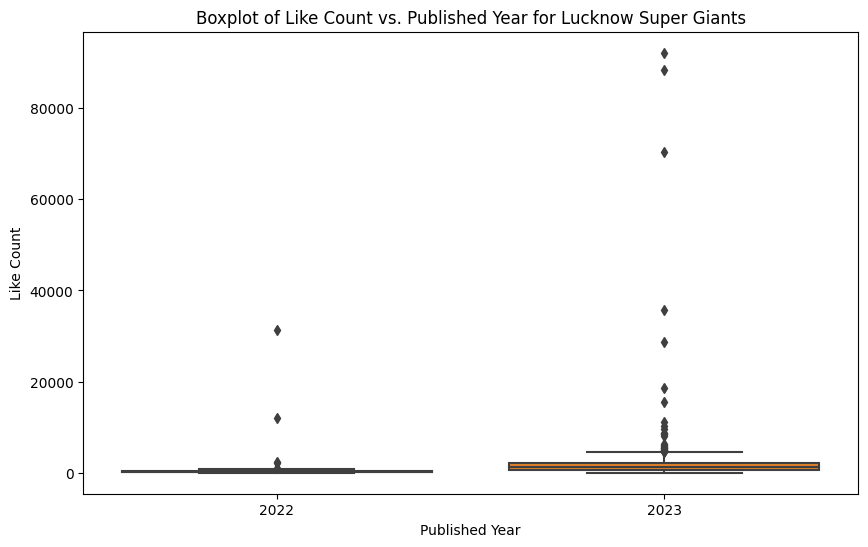

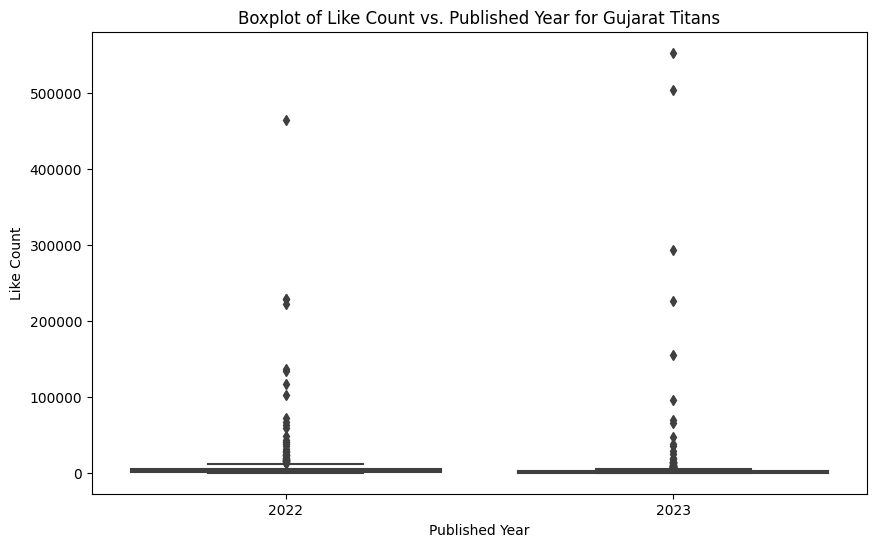

In [22]:
for col in channels:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=videos_df[videos_df['channelTitle'] == col], x='Published_Year', y='likeCount')
    plt.title(f"Boxplot of Like Count vs. Published Year for {col}")
    plt.xlabel("Published Year")
    plt.ylabel("Like Count")
    plt.show()

A general observation can be made that as the years passes the like count of videos has increased.

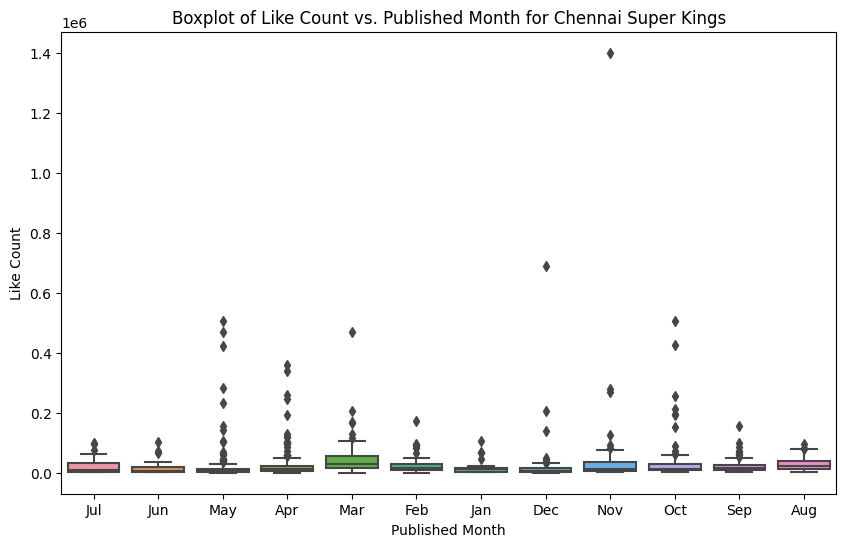

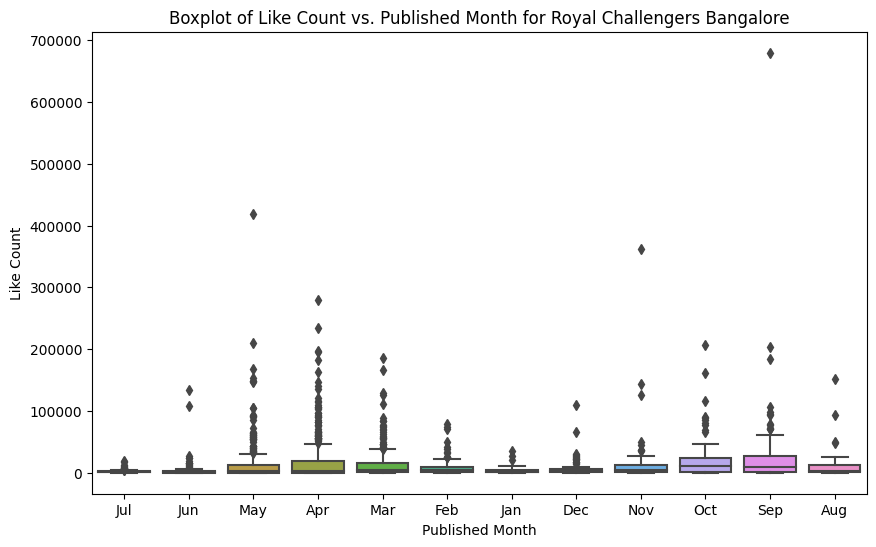

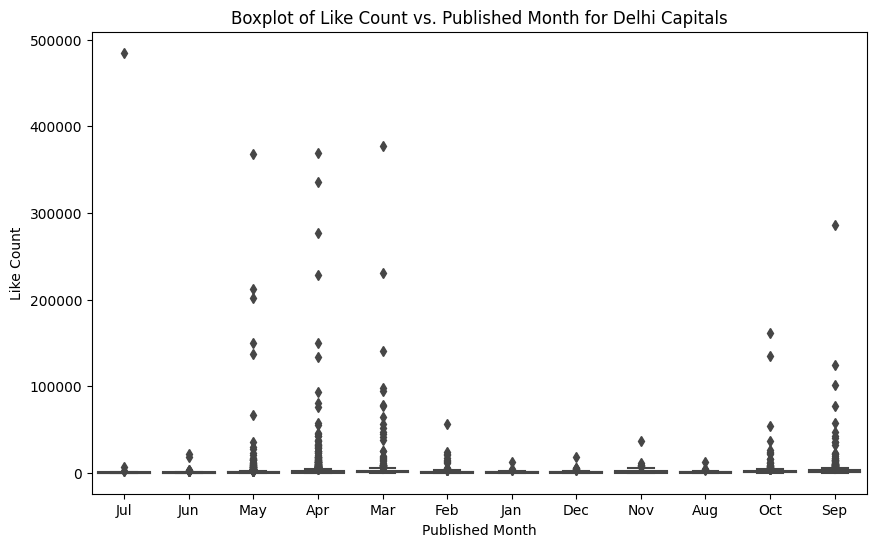

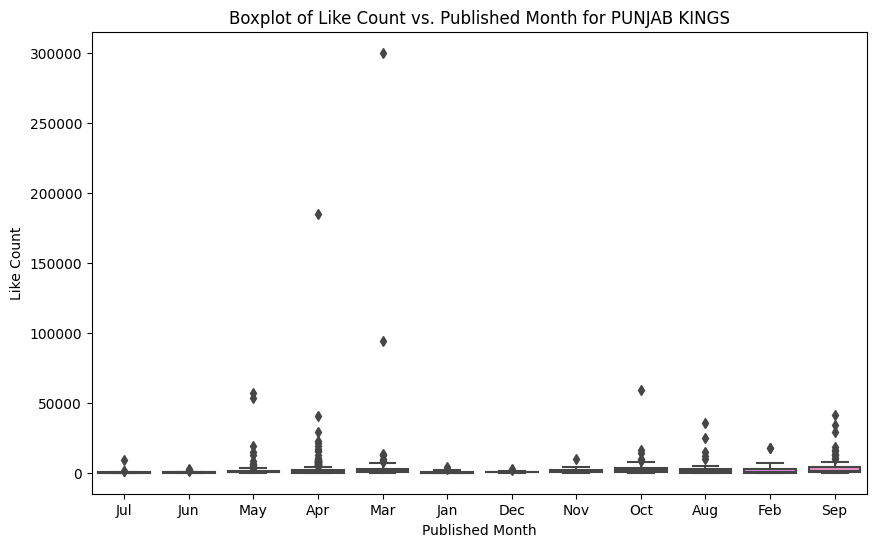

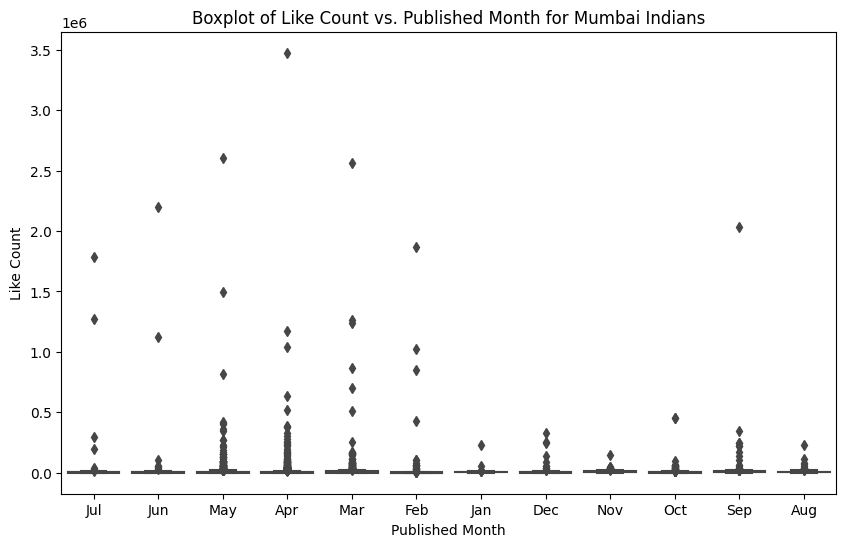

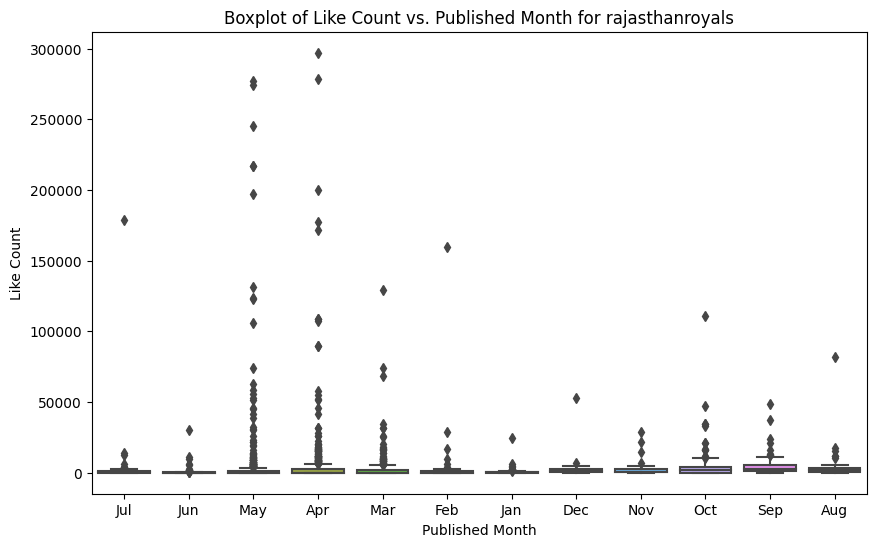

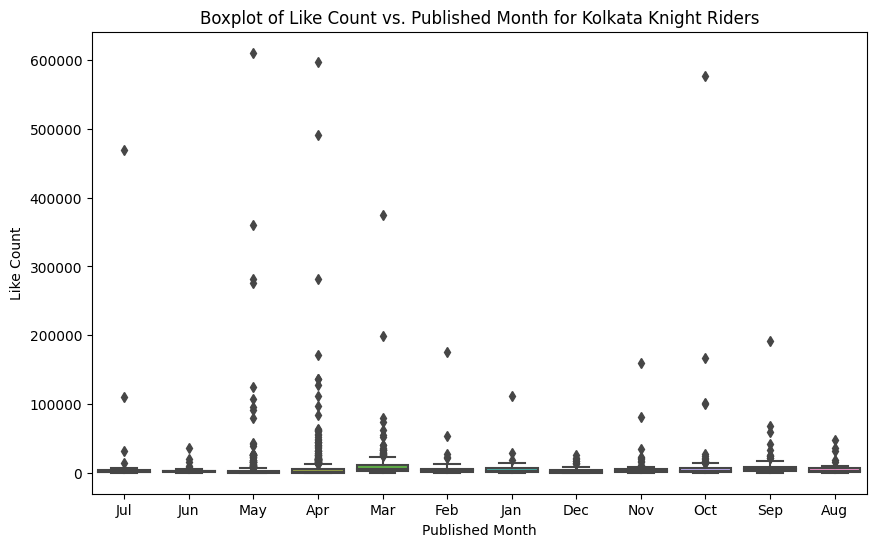

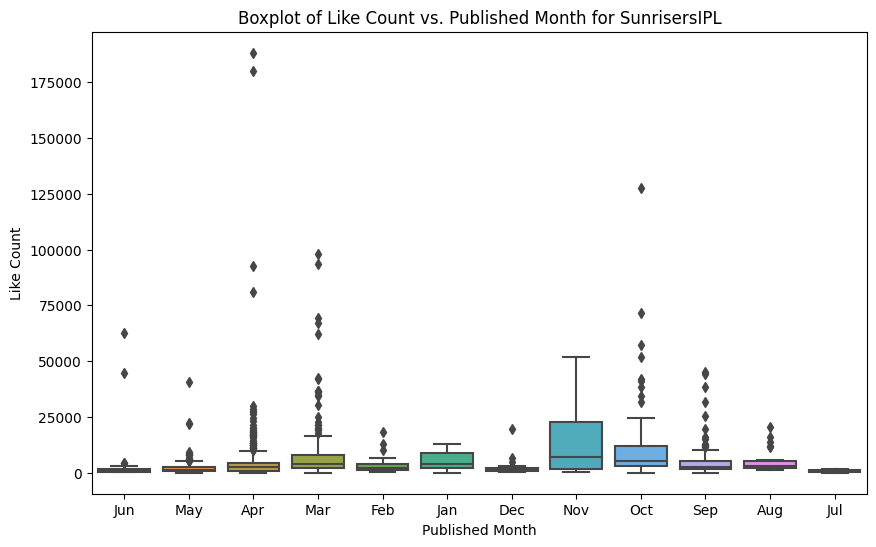

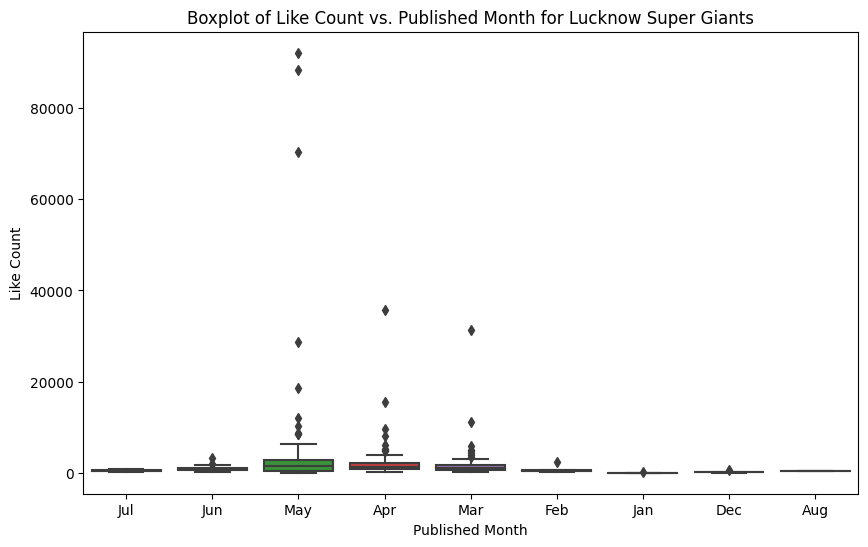

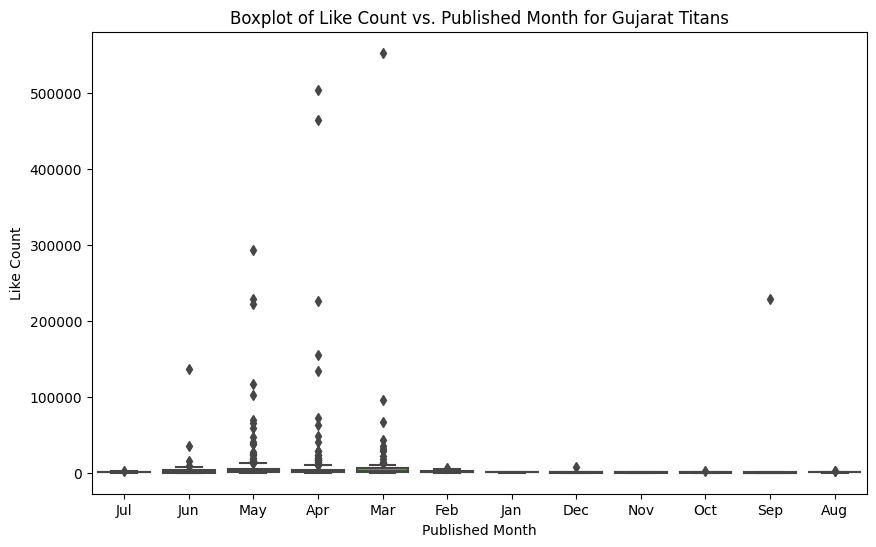

In [23]:
for col in channels:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=videos_df[videos_df['channelTitle'] == col], x='Published_Month', y='likeCount')
    plt.title(f"Boxplot of Like Count vs. Published Month for {col}")
    plt.xlabel("Published Month")
    plt.ylabel("Like Count")
    plt.show()

A general observation is made that for all channels in the months of March, April and May has the highest like count.

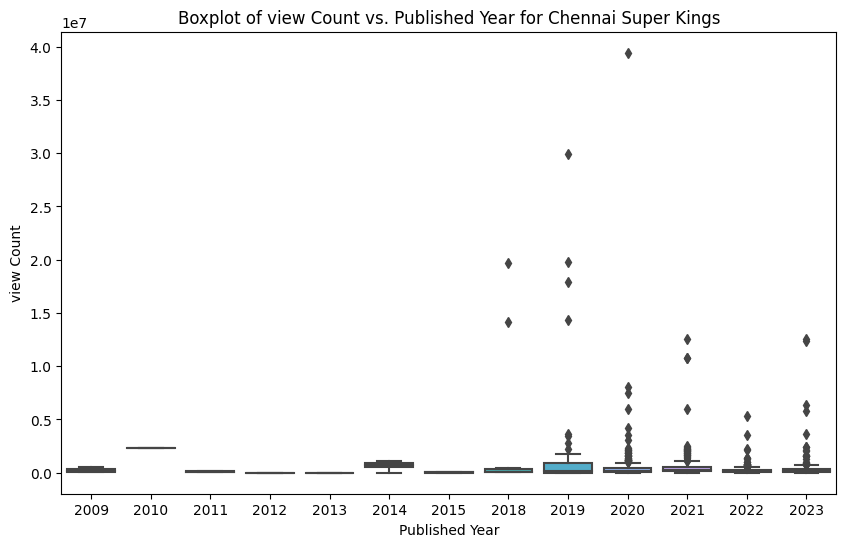

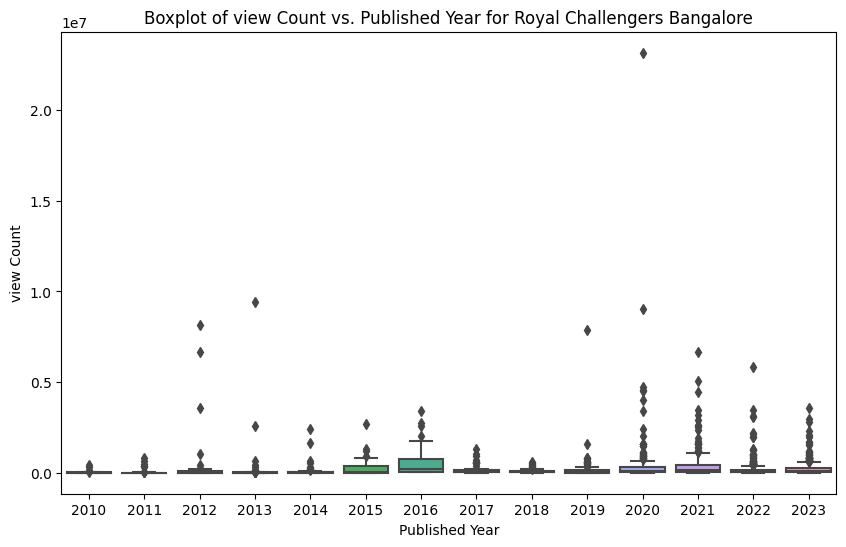

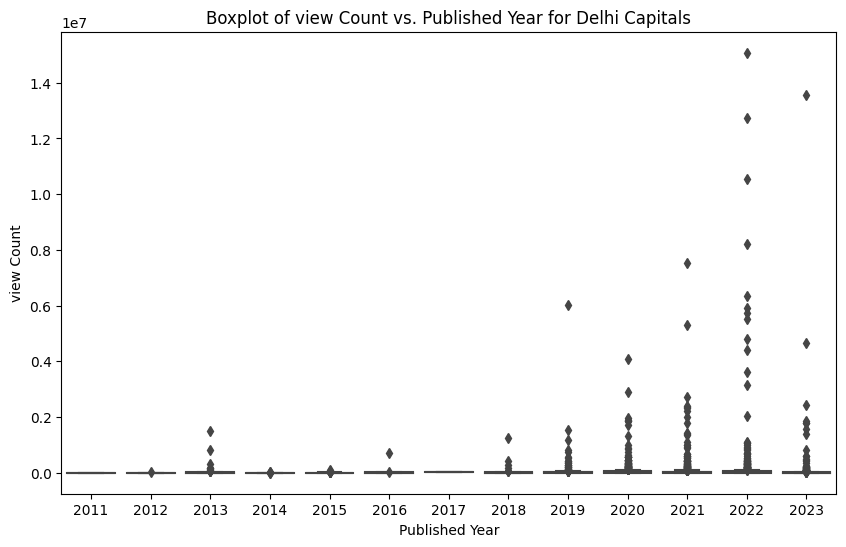

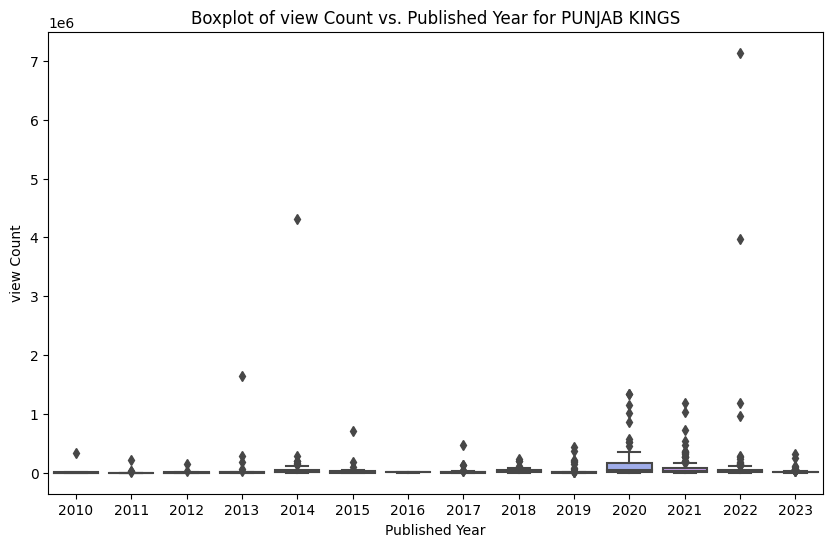

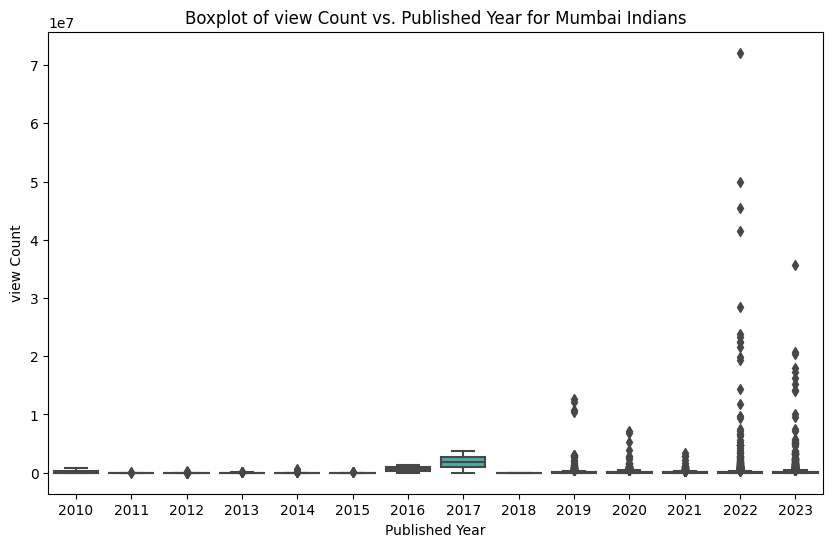

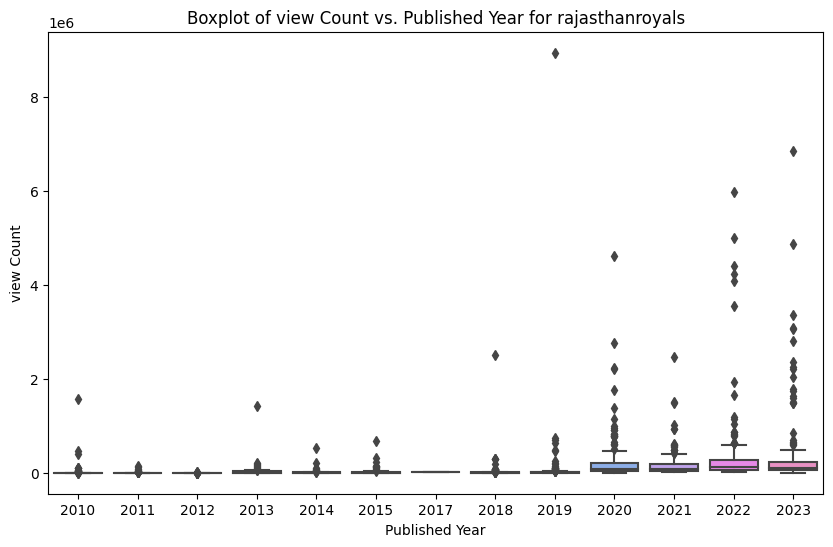

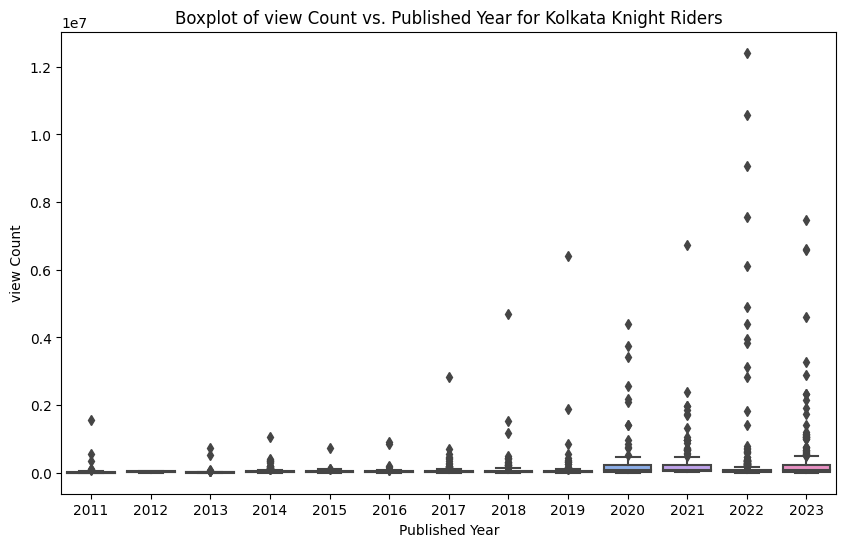

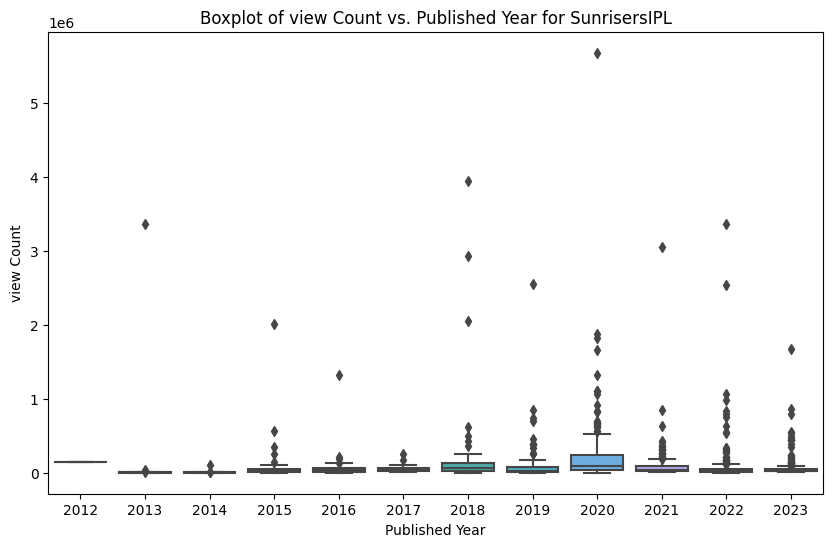

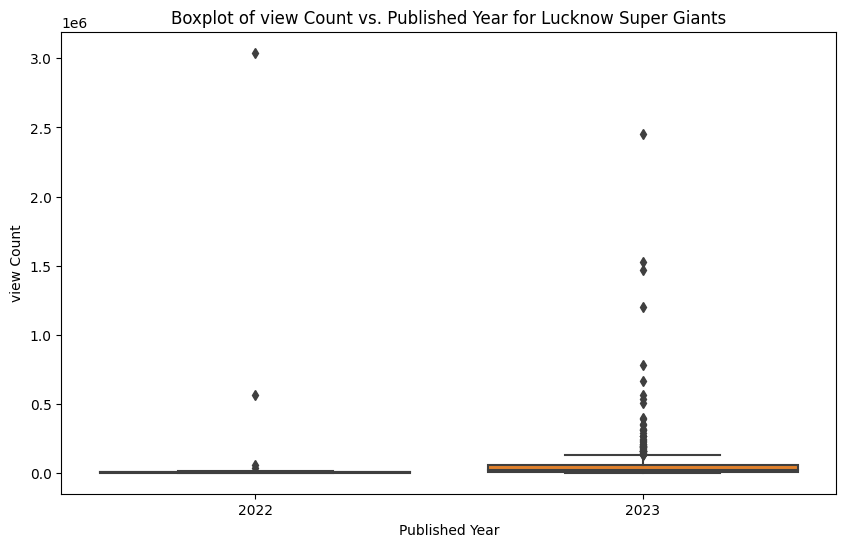

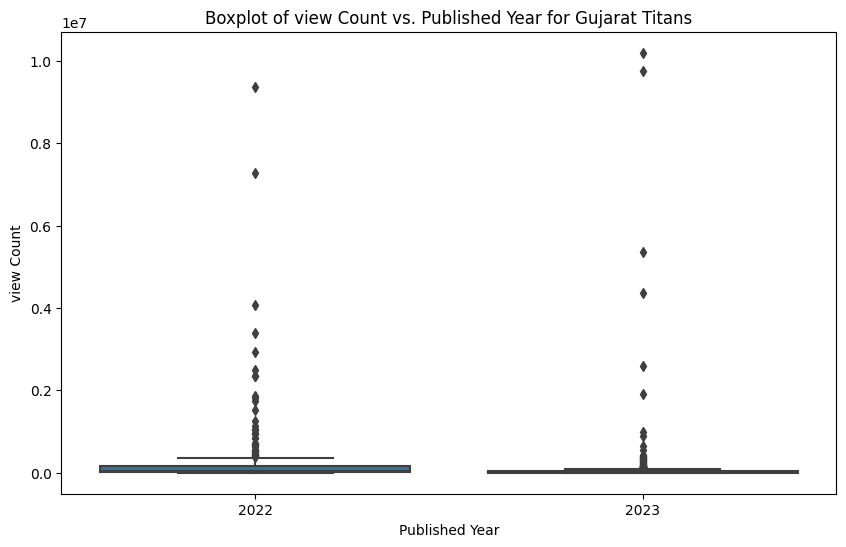

In [24]:
for col in channels:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=videos_df[videos_df['channelTitle'] == col], x='Published_Year', y='viewCount')
    plt.title(f"Boxplot of view Count vs. Published Year for {col}")
    plt.xlabel("Published Year")
    plt.ylabel("view Count")
    plt.show()

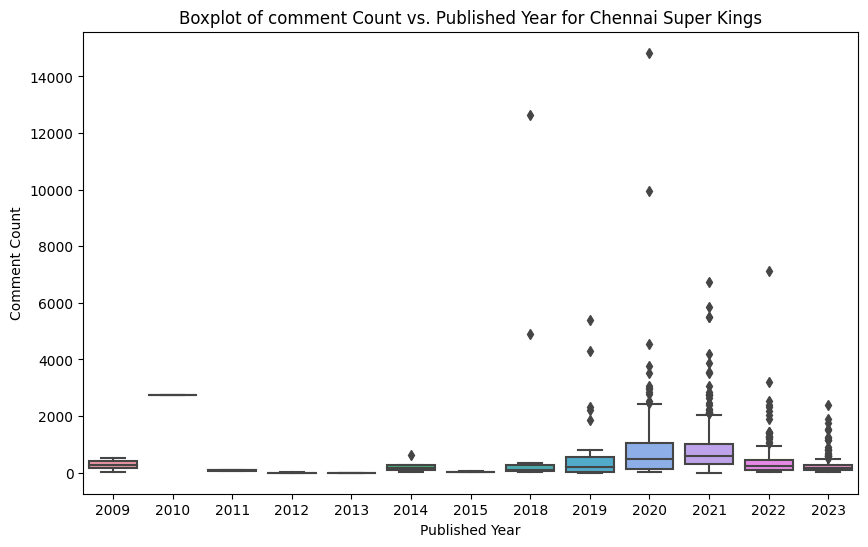

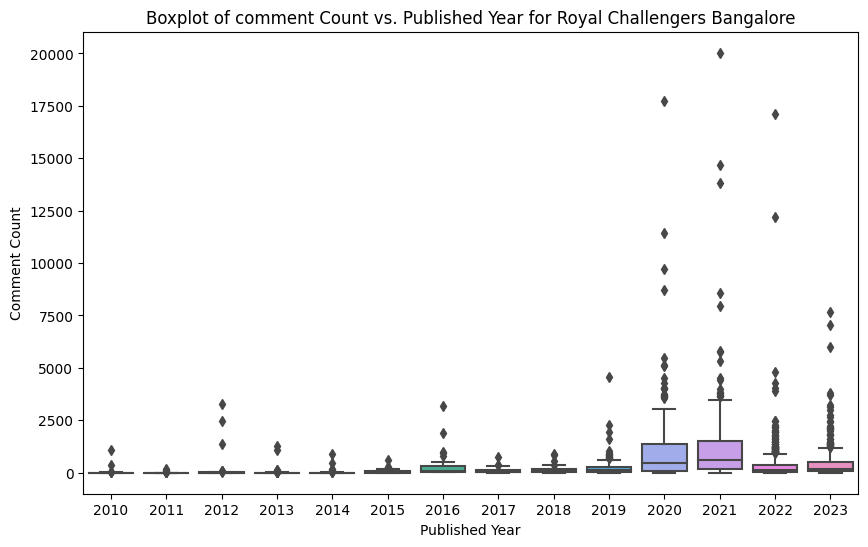

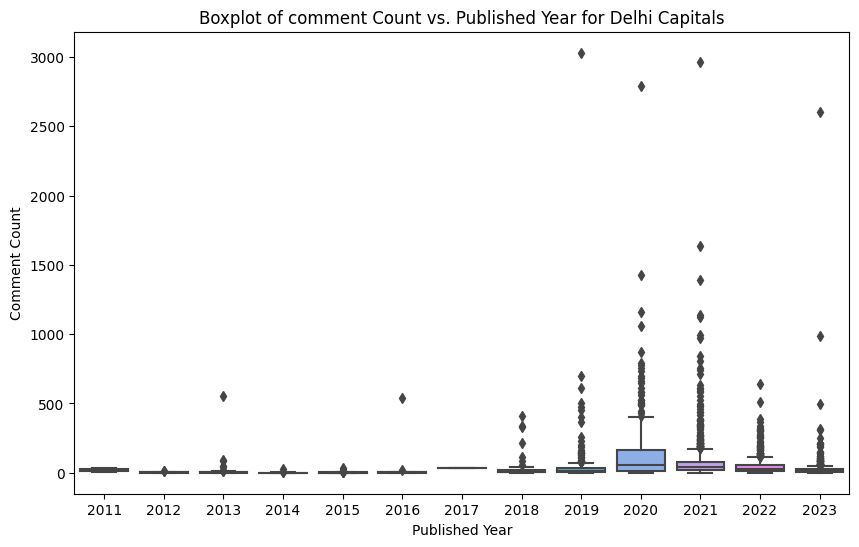

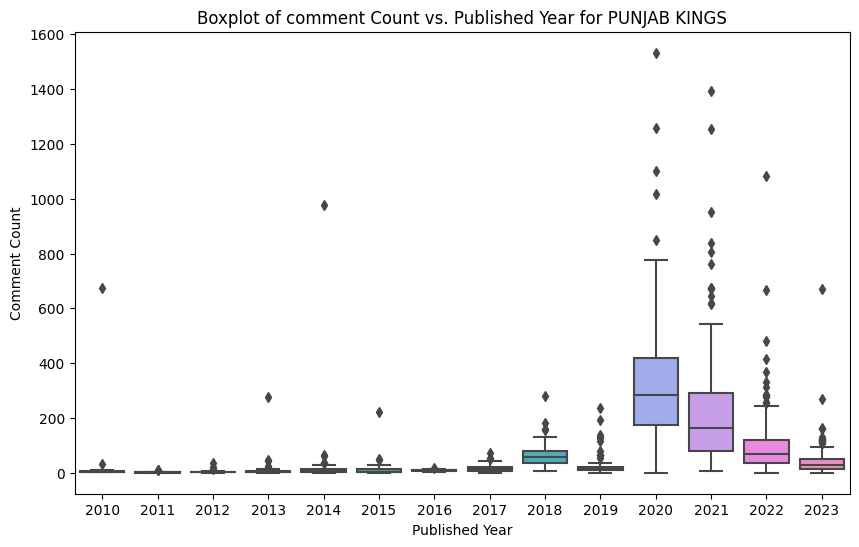

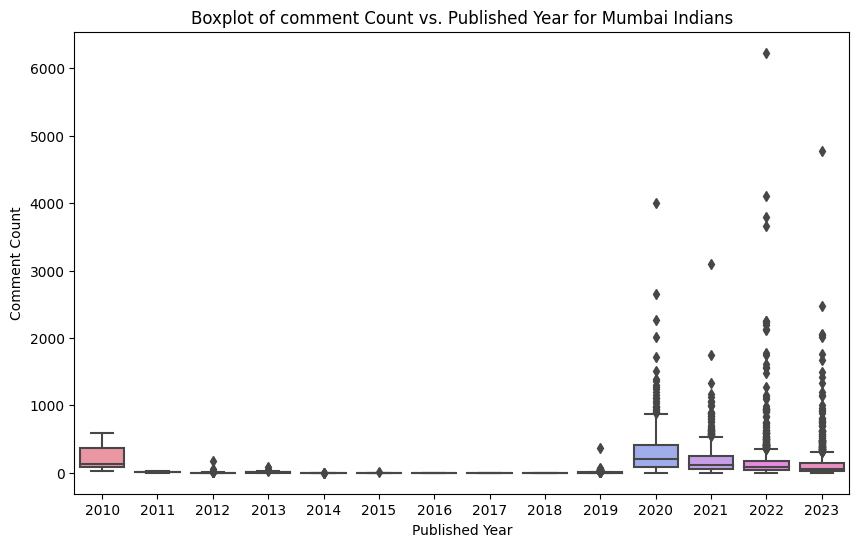

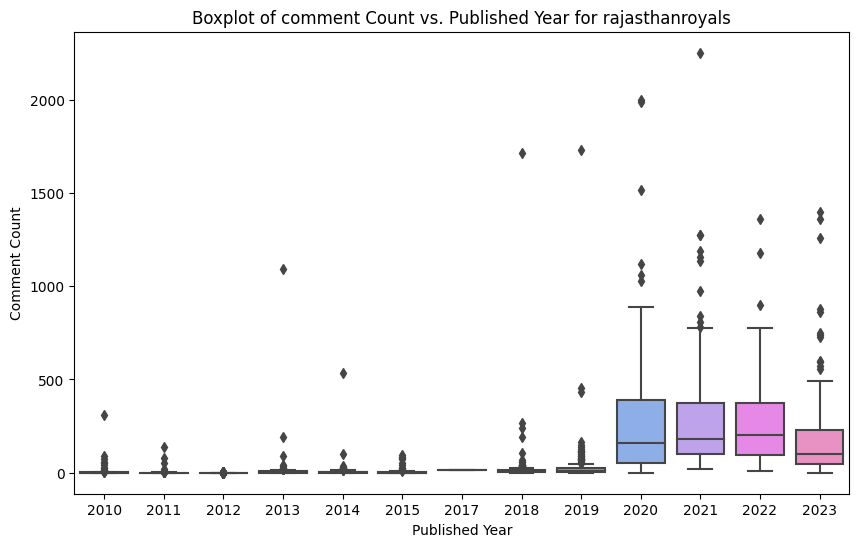

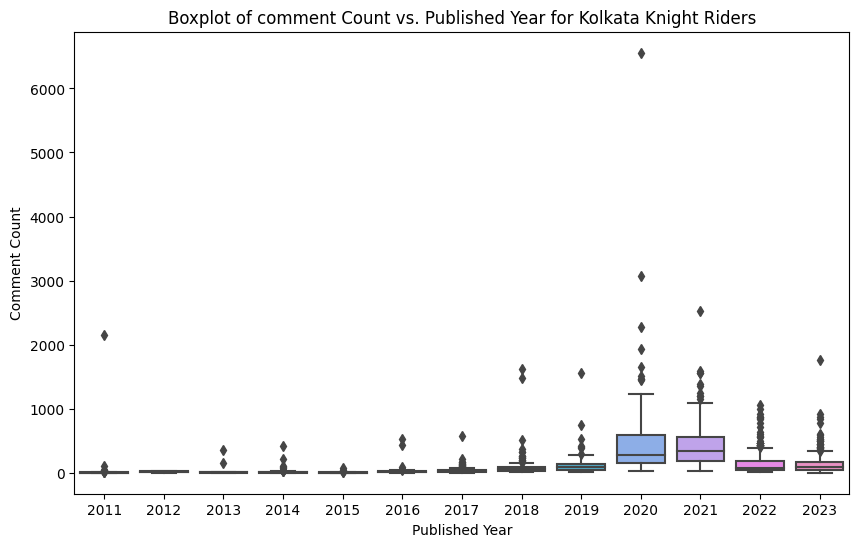

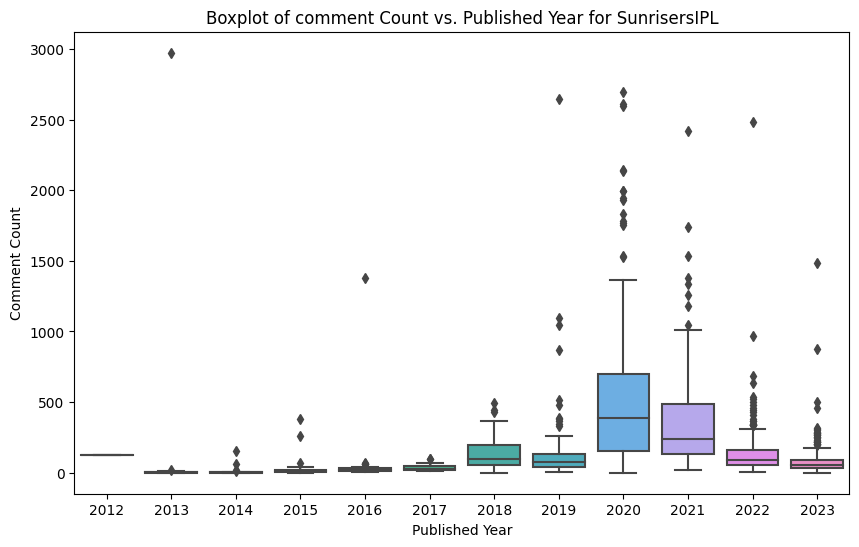

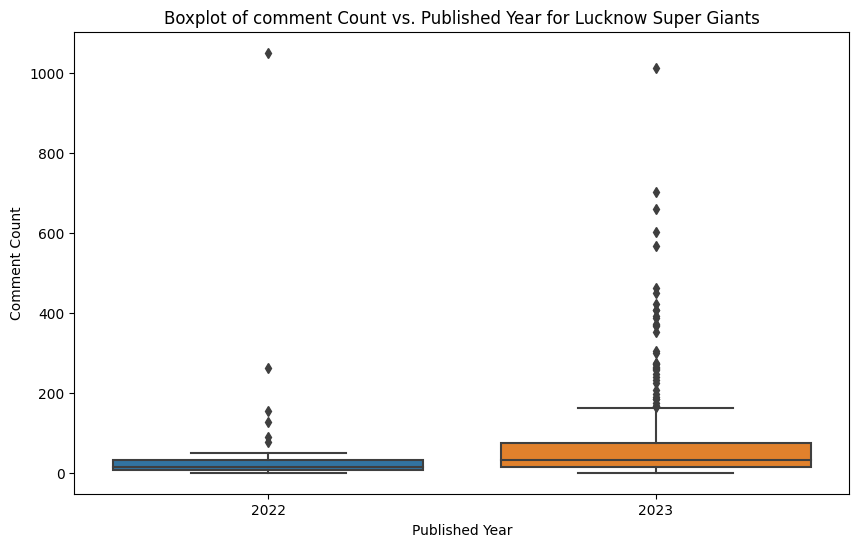

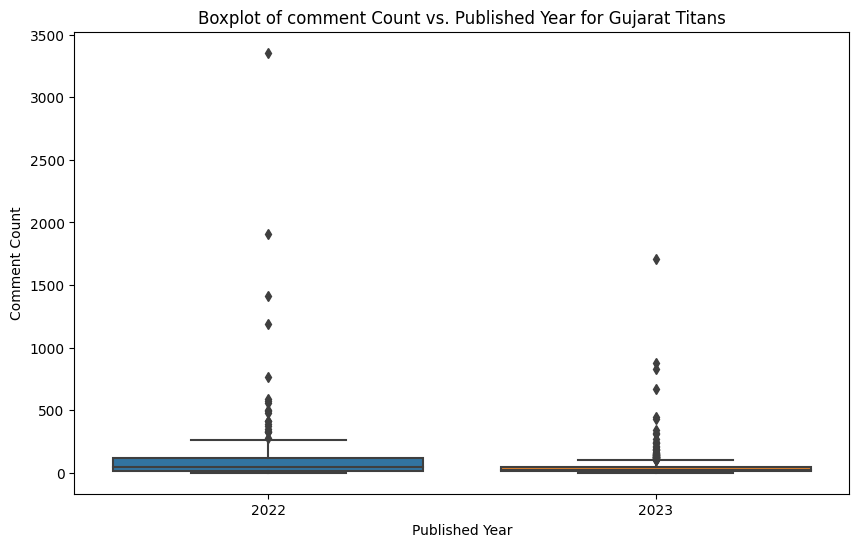

In [25]:
for col in channels:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=videos_df[videos_df['channelTitle'] == col], x='Published_Year', y='commentCount')
    plt.title(f"Boxplot of comment Count vs. Published Year for {col}")
    plt.xlabel("Published Year")
    plt.ylabel("Comment Count")
    plt.show()

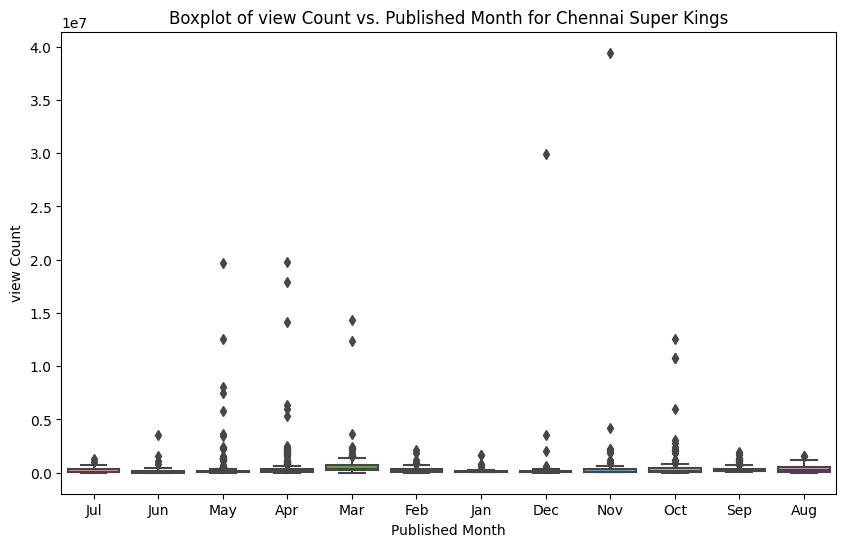

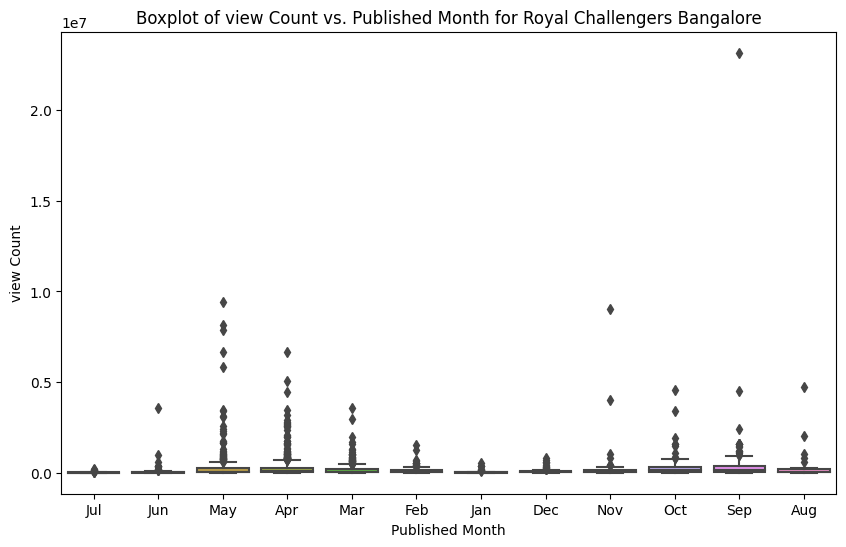

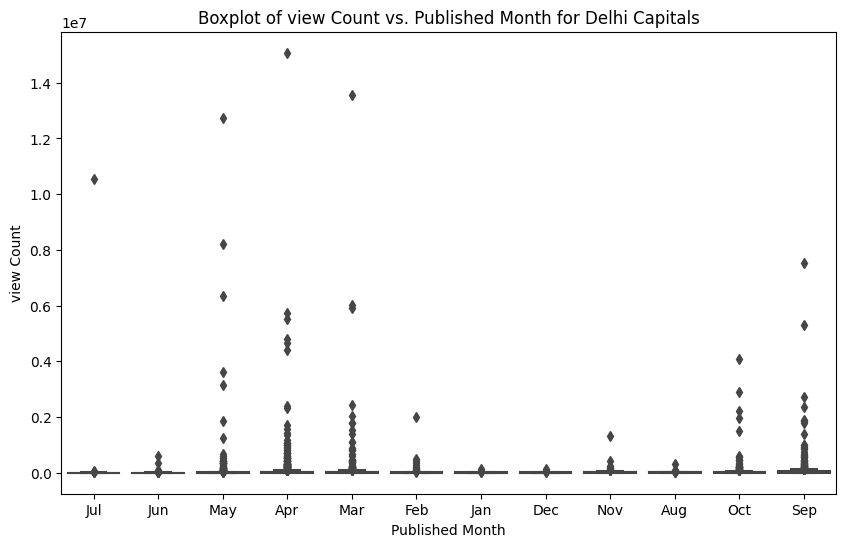

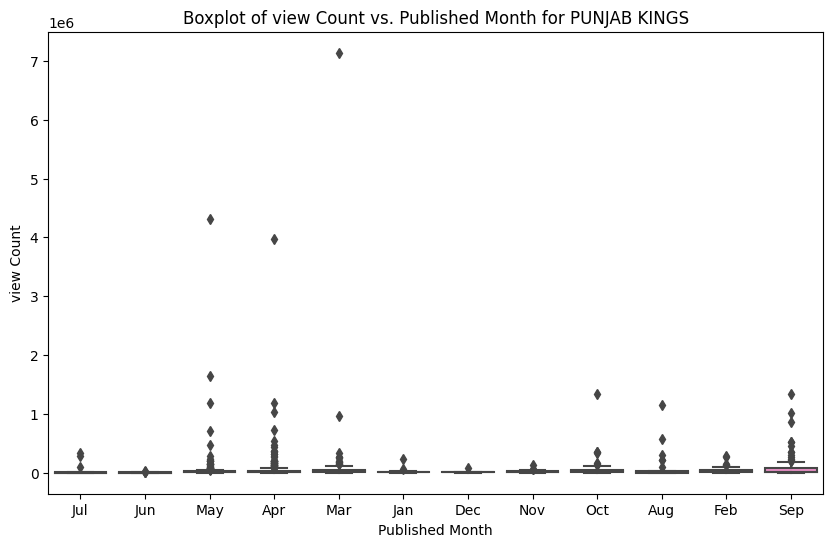

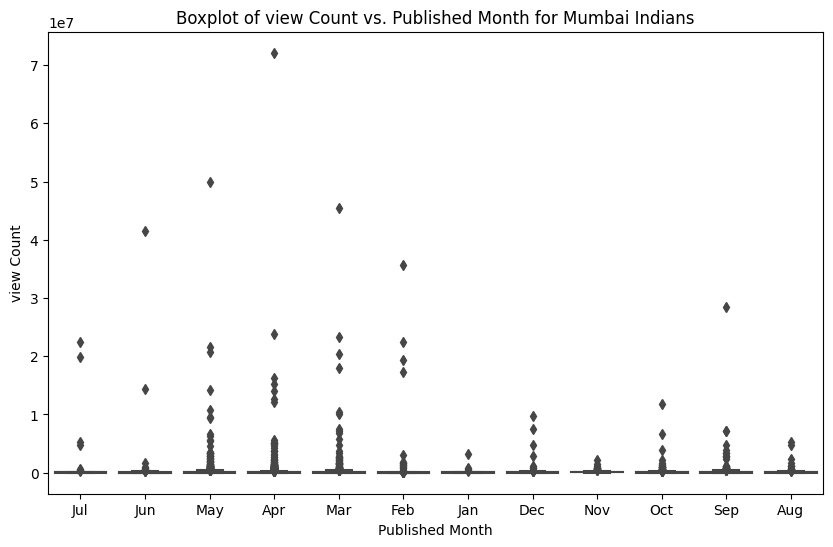

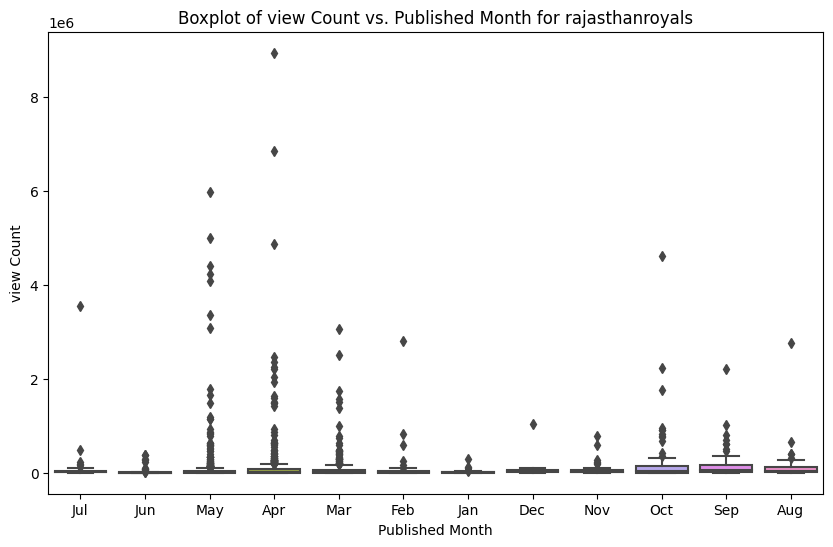

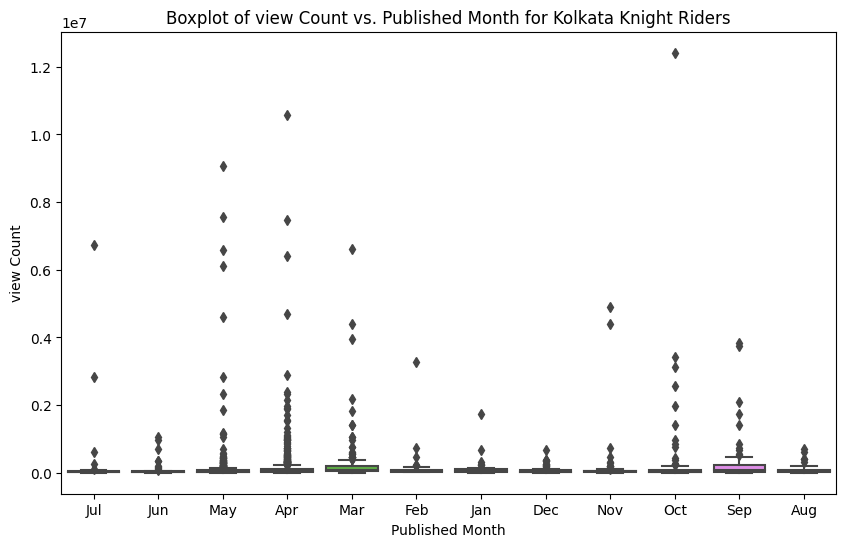

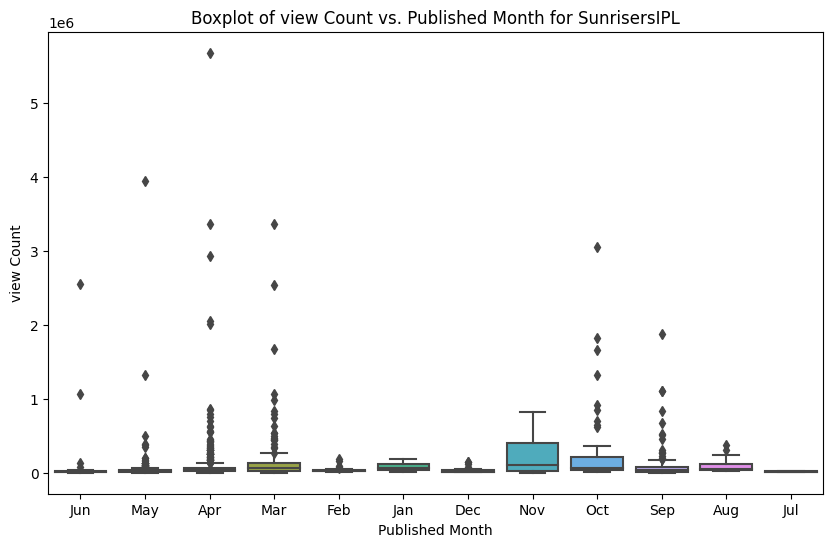

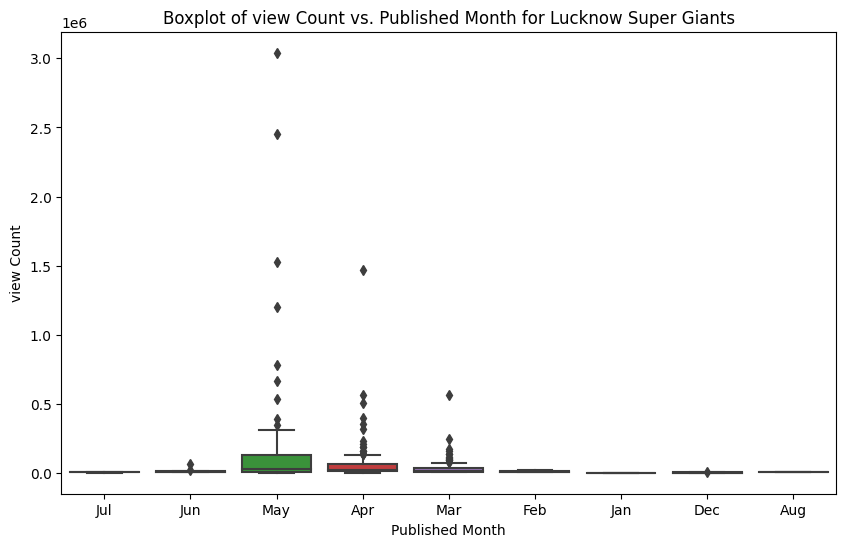

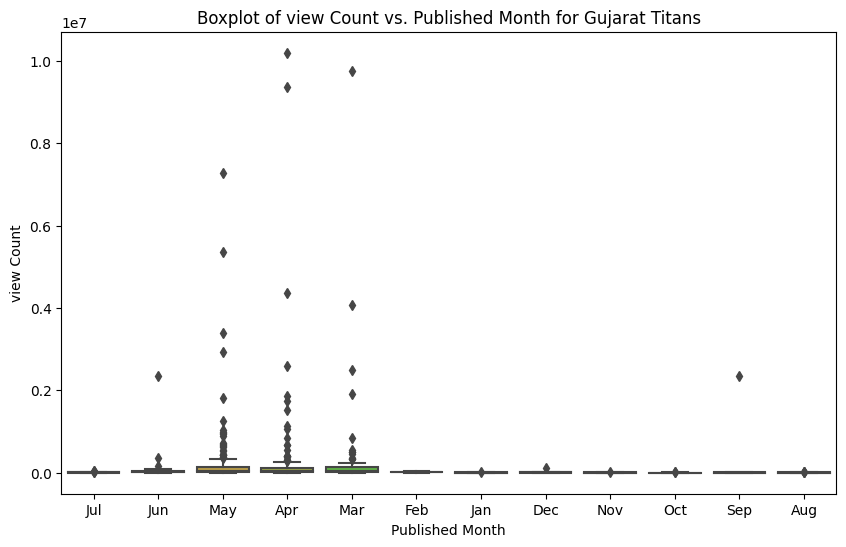

In [26]:
for col in channels:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=videos_df[videos_df['channelTitle'] == col], x='Published_Month', y='viewCount')
    plt.title(f"Boxplot of view Count vs. Published Month for {col}")
    plt.xlabel("Published Month")
    plt.ylabel("view Count")
    plt.show()

A general observation is made that for all channels in the months of March, April and May has the highest view count.

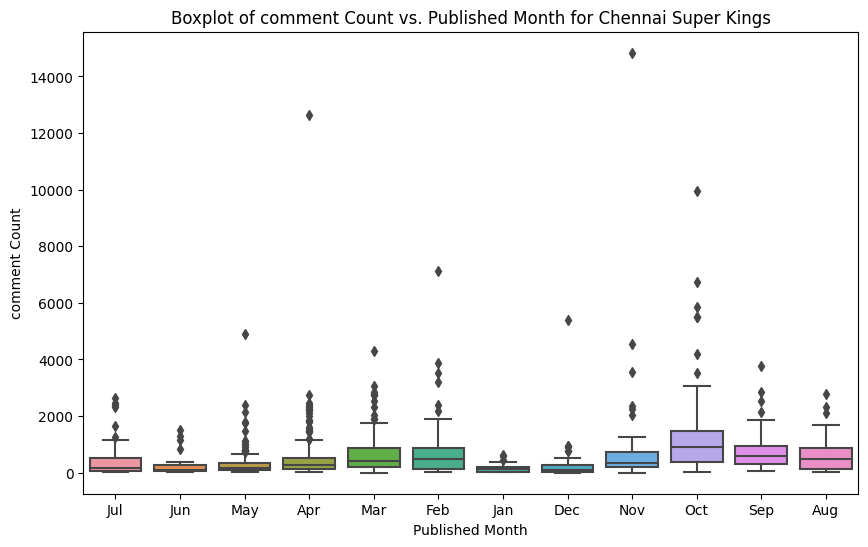

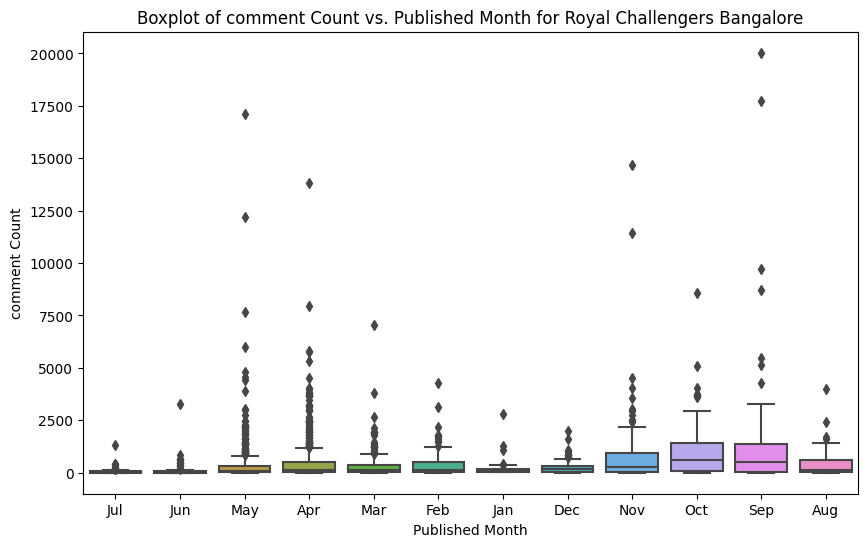

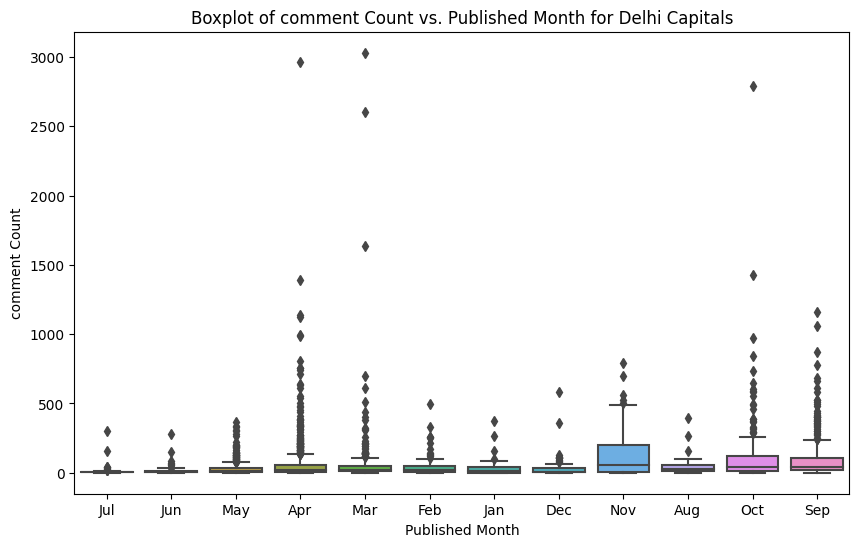

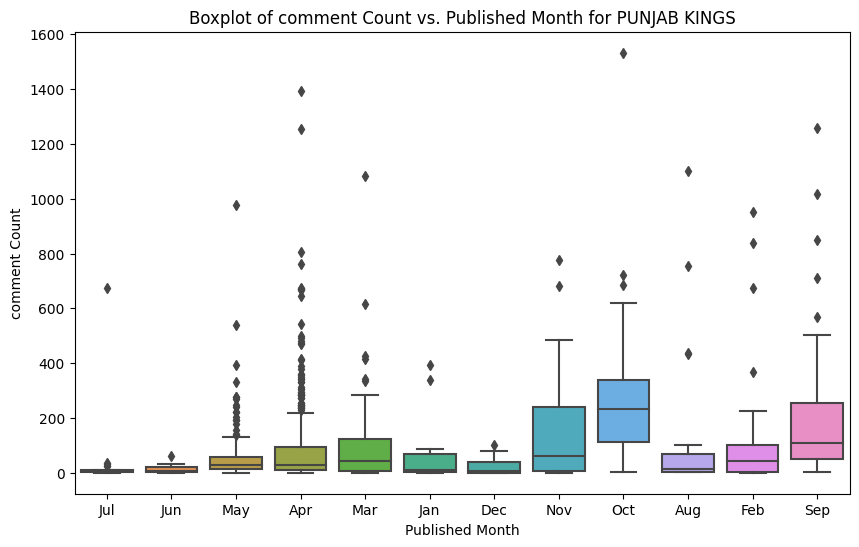

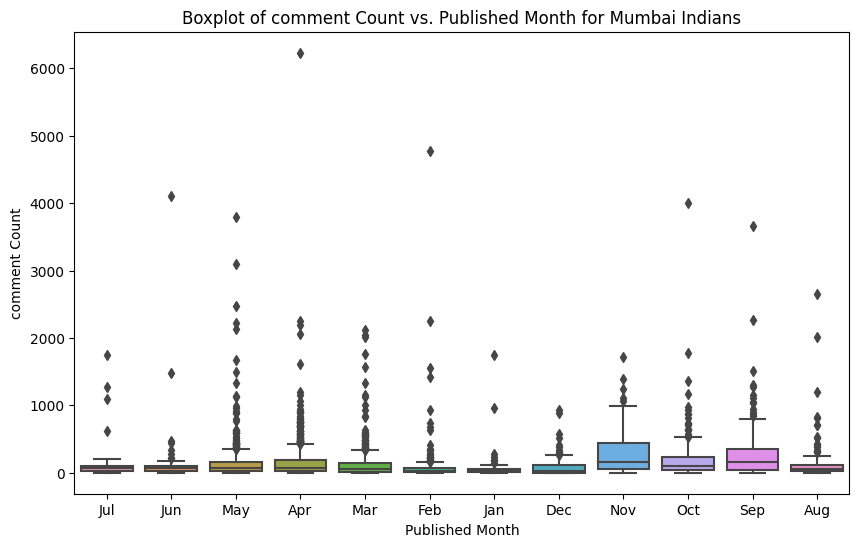

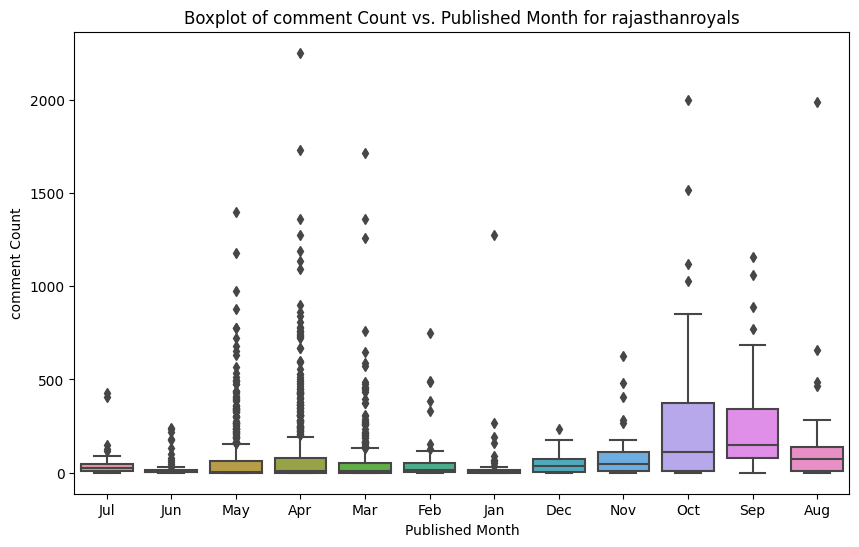

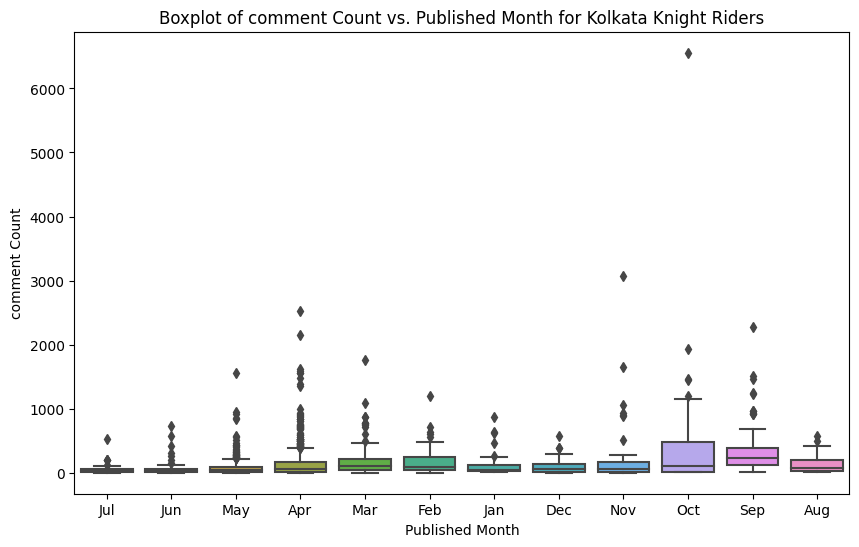

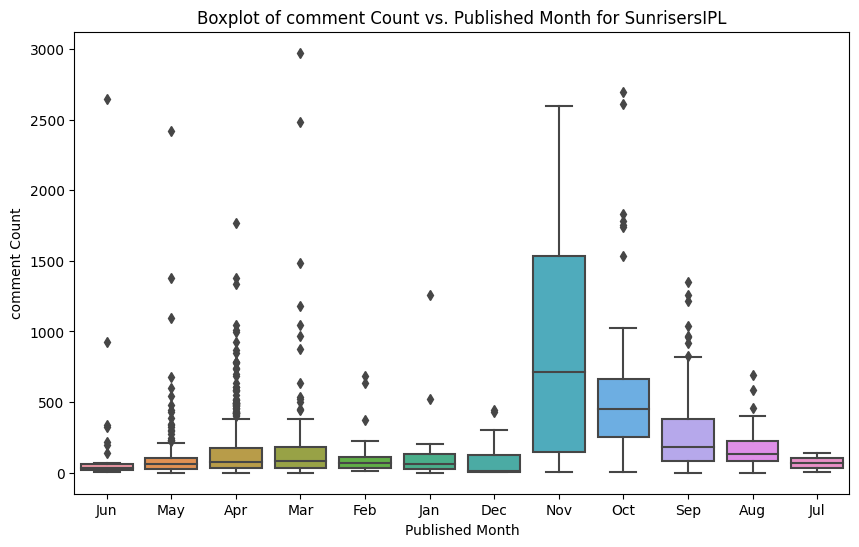

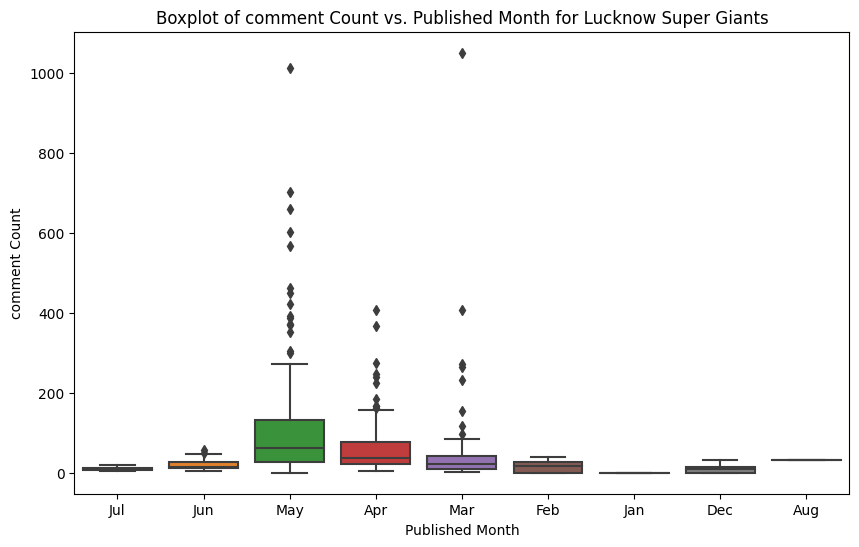

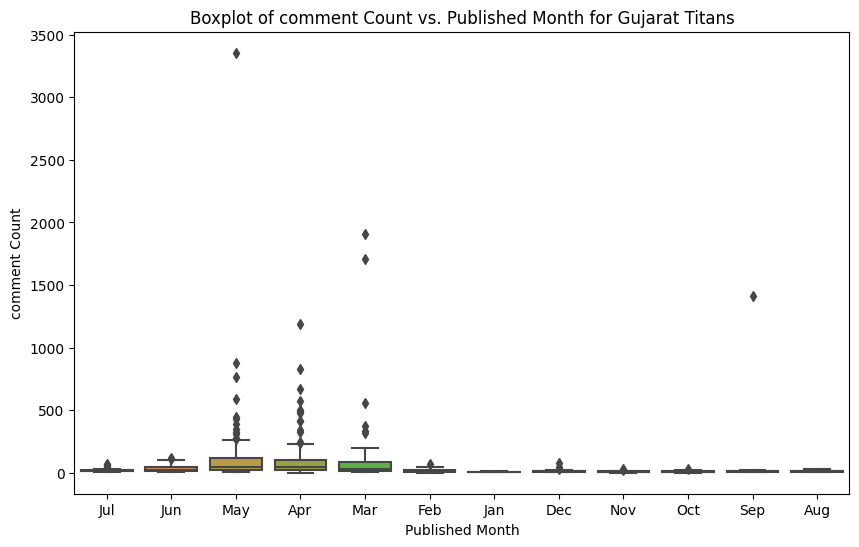

In [27]:
for col in channels:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=videos_df[videos_df['channelTitle'] == col], x='Published_Month', y='commentCount')
    plt.title(f"Boxplot of comment Count vs. Published Month for {col}")
    plt.xlabel("Published Month")
    plt.ylabel("comment Count")
    plt.show()

A general observation is made that for all channels in the months of March, April and May has the highest comment count.